In [1]:
#import model_attributes as ma
from attribute_table import AttributeTable
import importlib
import itertools
import math
import numpy as np
import os, os.path
import pandas as pd
import pyDOE2 as pyd
import setup_analysis as sa
import sisepuede as ssp
import sql_utilities as sqlutil
import support_functions as sf
import time
import warnings
import sys
import ingestion as ing
import sampling_unit as su
from typing import *

import matplotlib.pyplot as plt

import lhs_design as ld
import sqlalchemy

#importlib.reload(ma)
importlib.reload(sa)
importlib.reload(ing)
importlib.reload(su)

import logging

warnings.filterwarnings("ignore")

def _setup_logger(namespace: str, fn_out: Union[str, None] = None) -> None:
    global logger
    
    format_str = "%(asctime)s - %(levelname)s - %(message)s"
    # configure
    if fn_out is not None:
        logging.basicConfig(
            filename = fn_out,
            filemode = "w",
            format = format_str,
            level = logging.DEBUG
        )
    else:
        logging.basicConfig(
            format = format_str,
            level = logging.DEBUG
        )
        
    logger = logging.getLogger(namespace)
    # create console handler and set level to debug
    ch = logging.StreamHandler()
    ch.setLevel(logging.DEBUG)
    # create formatter
    formatter = logging.Formatter(format_str)
    # add formatter to ch
    ch.setFormatter(formatter)
    # add ch to logger
    logger.addHandler(ch)

    return logger

_setup_logger(__name__, os.path.join(os.getcwd(), "log_temp.log"))

/Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/python/model_attributes.py:1945: UserWarning: Invalid subsector attribute 'key_varreqs_partial'. Valid return type values are:'pycategory_primary', 'abv_subsector', 'sector', 'abv_sector', 'key_varreqs_all'
  warnings.warn(f"Invalid subsector attribute '{return_type}'. Valid return type values are:{valid_rts}")
/Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/python/model_attributes.py:1945: UserWarning: Invalid subsector attribute 'key_varreqs_partial'. Valid return type values are:'pycategory_primary', 'abv_subsector', 'sector', 'abv_sector', 'key_varreqs_all'
  warnings.warn(f"Invalid subsector attribute '{return_type}'. Valid return type values are:{valid_rts}")


<Logger __main__ (DEBUG)>

In [2]:
2+2

4

In [5]:
import sisepuede as ssp
importlib.reload(ssp)
sisepuede = ssp.SISEPUEDE("demo", logger = logger);

2022-12-25 11:39:54,661 - INFO - Successfully initialized SISEPUEDEFileStructure.
2022-12-25 11:39:54,662 - WARNING - Missing key dict_dimensional_keys: key time_series not found. Tables that rely on the time_series will not have index checking.
2022-12-25 11:39:54,662 - INFO - 	Setting export engine to 'sqlite'.
2022-12-25 11:39:54,666 - WARNING - No index fields defined. Index field values will not be checked when writing to tables.
2022-12-25 11:39:54,666 - INFO - Successfully instantiated table ANALYSIS_METADATA
2022-12-25 11:39:54,669 - WARNING - No index fields found in ATTRIBUTE_DESIGN. Initializing index fields.
2022-12-25 11:39:54,670 - INFO - Successfully instantiated table ATTRIBUTE_DESIGN
2022-12-25 11:39:54,673 - WARNING - No index fields found in ATTRIBUTE_LHC_SAMPLES_EXOGENOUS_UNCERTAINTIES. Initializing index fields.
2022-12-25 11:39:54,673 - INFO - Successfully instantiated table ATTRIBUTE_LHC_SAMPLES_EXOGENOUS_UNCERTAINTIES
2022-12-25 11:39:54,678 - WARNING - No index

In [4]:
fut = sisepuede.experimental_manager.dict_future_trajectories#base_input_database.database
fut.get("argentina").dict_all_dimensional_values

{'strategy_id': [0, 1, 2, 1001, 2001, 3001, 4001, 5001]}

In [10]:
dict_scens = {
    "future_id": [0, 471],
    "design_id": [1]
}
df_out = sisepuede.project_scenarios(
    dict_scens,
    chunk_size = 2
)

2022-11-17 13:34:59,957 - INFO - Running AFOLU model
2022-11-17 13:35:00,277 - INFO - AFOLU model run successfully completed
2022-11-17 13:35:00,278 - INFO - Running CircularEconomy model
2022-11-17 13:35:00,390 - INFO - CircularEconomy model run successfully completed
2022-11-17 13:35:00,392 - INFO - Running IPPU model
2022-11-17 13:35:00,522 - INFO - IPPU model run successfully completed
2022-11-17 13:35:00,522 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2022-11-17 13:35:00,699 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2022-11-17 13:35:00,699 - INFO - Running Energy model (Electricity: trying to call Julia)


Warning in project_enfu_production_and_demands: Variable 'Energy Demand by Fuel in Electricity' not found in the data frame. Its fuel demands will not be included.
Warning in project_enfu_production_and_demands: Variable 'Energy Demand by Fuel in Electricity' not found in the data frame. Its fuel demands will not be included.


2022-11-17 13:36:10,481 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2022-11-17 13:36:10,502 - INFO - ElectricEnergy model run successfully completed
2022-11-17 13:36:10,594 - INFO - Fugitive Emissions from Energy model run successfully completed
2022-11-17 13:36:10,598 - INFO - Model run for primary_id = 3003 successfully completed in 70.64 seconds.
2022-11-17 13:36:10,603 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2022-11-17 13:36:10,984 - INFO - AFOLU model run successfully completed
2022-11-17 13:36:10,985 - INFO - Running CircularEconomy model
2022-11-17 13:36:11,104 - INFO - CircularEconomy model run successfully completed
2022-11-17 13:36:11,105 - INFO - Running IPPU model
2022-11-17 13:36:11,232 - INFO - IPPU model run successfully completed
2022-11-17 13:36:11,232 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2022-11-17 13:36:11,404 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2022-11-17 13:36:11,405 - INFO - Running Energy model (Electricity: trying to call Julia)


Warning in project_enfu_production_and_demands: Variable 'Energy Demand by Fuel in Electricity' not found in the data frame. Its fuel demands will not be included.
Warning in project_enfu_production_and_demands: Variable 'Energy Demand by Fuel in Electricity' not found in the data frame. Its fuel demands will not be included.


2022-11-17 13:36:27,663 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2022-11-17 13:36:27,685 - INFO - ElectricEnergy model run successfully completed
2022-11-17 13:36:27,780 - INFO - Fugitive Emissions from Energy model run successfully completed
2022-11-17 13:36:27,783 - INFO - Model run for primary_id = 4004 successfully completed in 17.18 seconds.



	Running Energy (Fugitive Emissions)


2022-11-17 13:36:28,313 - INFO - Table MODEL_OUTPUT successfully written to database.
2022-11-17 13:36:28,318 - INFO - Running AFOLU model
2022-11-17 13:36:28,672 - INFO - AFOLU model run successfully completed
2022-11-17 13:36:28,673 - INFO - Running CircularEconomy model
2022-11-17 13:36:28,775 - INFO - CircularEconomy model run successfully completed
2022-11-17 13:36:28,775 - INFO - Running IPPU model
2022-11-17 13:36:28,895 - INFO - IPPU model run successfully completed
2022-11-17 13:36:28,896 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2022-11-17 13:36:29,063 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2022-11-17 13:36:29,063 - INFO - Running Energy model (Electricity: trying to call Julia)


Warning in project_enfu_production_and_demands: Variable 'Energy Demand by Fuel in Electricity' not found in the data frame. Its fuel demands will not be included.
Warning in project_enfu_production_and_demands: Variable 'Energy Demand by Fuel in Electricity' not found in the data frame. Its fuel demands will not be included.


2022-11-17 13:36:45,029 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2022-11-17 13:36:45,054 - INFO - ElectricEnergy model run successfully completed
2022-11-17 13:36:45,143 - INFO - Fugitive Emissions from Energy model run successfully completed
2022-11-17 13:36:45,146 - INFO - Model run for primary_id = 5005 successfully completed in 16.83 seconds.



	Running Energy (Fugitive Emissions)


2022-11-17 13:36:45,492 - INFO - Running AFOLU model
2022-11-17 13:36:45,823 - INFO - AFOLU model run successfully completed
2022-11-17 13:36:45,824 - INFO - Running CircularEconomy model
2022-11-17 13:36:45,930 - INFO - CircularEconomy model run successfully completed
2022-11-17 13:36:45,931 - INFO - Running IPPU model
2022-11-17 13:36:46,052 - INFO - IPPU model run successfully completed
2022-11-17 13:36:46,053 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2022-11-17 13:36:46,222 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2022-11-17 13:36:46,223 - INFO - Running Energy model (Electricity: trying to call Julia)


Warning in project_enfu_production_and_demands: Variable 'Energy Demand by Fuel in Electricity' not found in the data frame. Its fuel demands will not be included.
Warning in project_enfu_production_and_demands: Variable 'Energy Demand by Fuel in Electricity' not found in the data frame. Its fuel demands will not be included.


2022-11-17 13:37:01,847 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2022-11-17 13:37:01,869 - INFO - ElectricEnergy model run successfully completed
2022-11-17 13:37:01,954 - INFO - Fugitive Emissions from Energy model run successfully completed
2022-11-17 13:37:01,957 - INFO - Model run for primary_id = 3474 successfully completed in 16.46 seconds.



	Running Energy (Fugitive Emissions)


2022-11-17 13:37:02,905 - INFO - Table MODEL_OUTPUT successfully appended to database.
2022-11-17 13:37:02,910 - INFO - Running AFOLU model
2022-11-17 13:37:03,276 - INFO - AFOLU model run successfully completed
2022-11-17 13:37:03,277 - INFO - Running CircularEconomy model
2022-11-17 13:37:03,381 - INFO - CircularEconomy model run successfully completed
2022-11-17 13:37:03,382 - INFO - Running IPPU model
2022-11-17 13:37:03,494 - INFO - IPPU model run successfully completed
2022-11-17 13:37:03,495 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2022-11-17 13:37:03,660 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2022-11-17 13:37:03,660 - INFO - Running Energy model (Electricity: trying to call Julia)


Warning in project_enfu_production_and_demands: Variable 'Energy Demand by Fuel in Electricity' not found in the data frame. Its fuel demands will not be included.
Warning in project_enfu_production_and_demands: Variable 'Energy Demand by Fuel in Electricity' not found in the data frame. Its fuel demands will not be included.


2022-11-17 13:37:18,340 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2022-11-17 13:37:18,360 - INFO - ElectricEnergy model run successfully completed
2022-11-17 13:37:18,448 - INFO - Fugitive Emissions from Energy model run successfully completed
2022-11-17 13:37:18,451 - INFO - Model run for primary_id = 4475 successfully completed in 15.54 seconds.
2022-11-17 13:37:18,455 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2022-11-17 13:37:18,803 - INFO - AFOLU model run successfully completed
2022-11-17 13:37:18,804 - INFO - Running CircularEconomy model
2022-11-17 13:37:18,902 - INFO - CircularEconomy model run successfully completed
2022-11-17 13:37:18,903 - INFO - Running IPPU model
2022-11-17 13:37:19,014 - INFO - IPPU model run successfully completed
2022-11-17 13:37:19,014 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2022-11-17 13:37:19,175 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2022-11-17 13:37:19,176 - INFO - Running Energy model (Electricity: trying to call Julia)


Warning in project_enfu_production_and_demands: Variable 'Energy Demand by Fuel in Electricity' not found in the data frame. Its fuel demands will not be included.
Warning in project_enfu_production_and_demands: Variable 'Energy Demand by Fuel in Electricity' not found in the data frame. Its fuel demands will not be included.


2022-11-17 13:37:34,452 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2022-11-17 13:37:34,474 - INFO - ElectricEnergy model run successfully completed
2022-11-17 13:37:34,561 - INFO - Fugitive Emissions from Energy model run successfully completed
2022-11-17 13:37:34,564 - INFO - Model run for primary_id = 5476 successfully completed in 16.11 seconds.



	Running Energy (Fugitive Emissions)


2022-11-17 13:37:34,995 - INFO - Table MODEL_OUTPUT successfully appended to database.


In [ ]:
sisepuede.experimental_manager.base_input_database.database

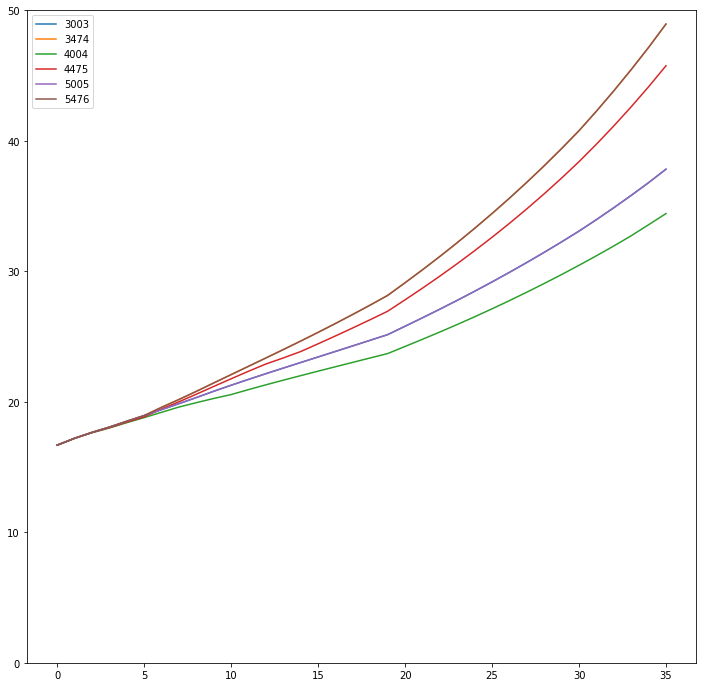

In [10]:
fig, ax = plt.subplots(figsize = (12, 12))
ax.set_ylim(0, 50)
for i in sorted(list(df_out["primary_id"].unique())):
    
    df_cur = df_out[df_out["primary_id"] == i]
    
    y = np.array(df_cur[
        [x for x in df_out.columns if x.startswith("emission_co2e_subsector_")]
    ].sum(axis = 1)) 
    x = np.array(df_cur["time_period"])
    
    ax.plot(x, y, label = i)
    
ax.legend()
plt.show()


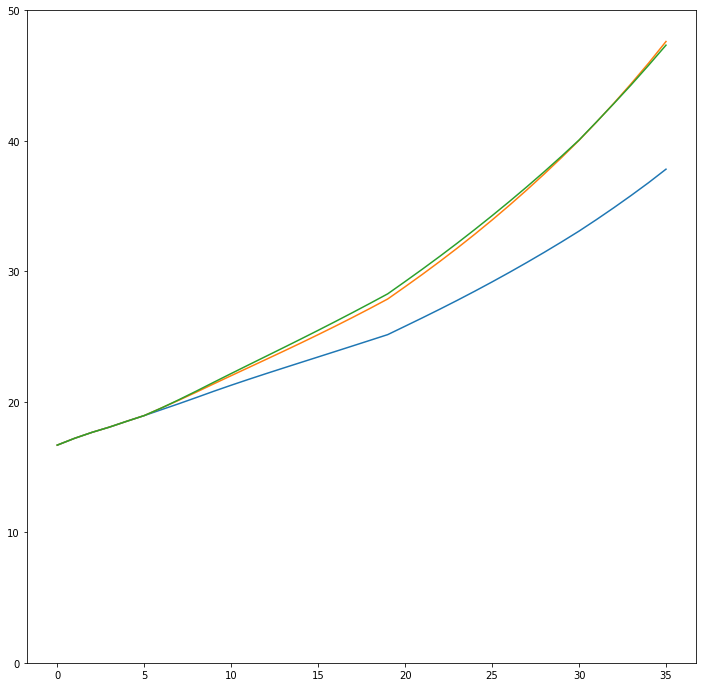

In [15]:
fig, ax = plt.subplots(figsize = (12, 12))
ax.set_ylim(0, 50)
for i in sorted(list(df_out["primary_id"].unique())):
    
    df_cur = df_out[df_out["primary_id"] == i]
    
    y = np.array(df_cur[
        [x for x in df_out.columns if x.startswith("emission_co2e_subsector_")]
    ].sum(axis = 1)) 
    x = np.array(df_cur["time_period"])
    
    ax.plot(x, y)
    
plt.show()


In [3]:
if False:
    #
    #    CHECK TRAJECTORY GROUPS THAT DON'T VARY
    #
    ft = sisepuede.experimental_manager.dict_future_trajectories["argentina"]
    d = ft.dict_sampling_units

    units = []
    vs = []
    for k in d.keys():
        if not d[k].variable_trajectory_group_vary_q:
            units.append(k)
            vs += d[k].variable_specifications



if False:
    #
    #    CHECK ELECTRICITY MODEL
    #
    import model_electricity as ml 
    importlib.reload(ml)
    model_elec_tmp = ml.ElectricEnergy(
        sa.model_attributes,
        sa.dir_jl,
        sa.dir_ref_nemo
    )

    df_elec = model_elec_tmp.project(
        df_out2, 
        fp_database = sisepuede.file_struct.fp_sqlite_tmp_nemomod_intermediate
    )


if False:
    #
    #    CHECK INITIAL VALUES
    #
    dict_vals = {
        0: sisepuede.generate_scenario_database_from_primary_key(0)["DEMO"],
        1989: sisepuede.generate_scenario_database_from_primary_key(1989)["DEMO"],
    };

    for x in dict_vals[0].columns:
        if dict_vals[0][x].iloc[0] != dict_vals[1989][x].iloc[0]:
            print(x)


if True:
    #
    #    CHECK SAMPLING UNITS
    #

    importlib.reload(sf)
    importlib.reload(su)
    df_base = sisepuede.experimental_manager.base_input_database.database
    samp = su.SamplingUnit(
        df_base[
            df_base["variable"] == "ef_soil_ef1_n_organic_amerndments_fertilizer_n2o_dry_climate"
        ],
        {"strategy_id": 0},
        5
    )

    samp.generate_future(1, baseline_future_q = False, vary_q = False)

In [3]:
import importlib
import temp2 as tmp
importlib.reload(tmp)

<module 'temp2' from '/Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/python/temp2.py'>

In [4]:
df_chile = pd.read_csv("/Users/jsyme/Documents/Projects/FY20/SWCHE102-1000/git/MultiSector_LTS_Chile/ref/parameter_ranges.csv")
df_chile = df_chile[df_chile["time_series_id"] == 0].rename(
    columns = {
        "parameter": "variable"
    }
).drop(
    ["time_series_id",  "type"], axis = 1
)

ind = 1
vars_keep = [x for x in list(df_chile["variable"]) if (f"trajgroup_{ind}" in x) and ("-lhs" not in x)]
df_chile = df_chile[
    df_chile["variable"].isin(vars_keep)
].reset_index(drop = True)

def func_temp(x):
    if "trajmax" in x:
        out = "trajectory_boundary_1"
    elif "trajmin" in x:
        out = "trajectory_boundary_0"
    elif "trajmix" in x:
        out = "mix"
    else:
        out = None
        
    return out

def funct_split(x):
    x = x.replace(f"trajgroup_{ind}-", "")
    comp = None
    if "trajmax" in x:
        comp = "trajmax"
    elif "trajmin" in x:
        comp = "trajmin"
    elif "trajmix" in x:
        comp = "trajmix"

    if comp is not None:
        x = x.replace(f"{comp}_", "")
        
    return x

df_chile["variable_trajectory_group"] = ind
df_chile["uniform_scaling_q"] = None
df_chile["variable_trajectory_group_trajectory_type"] = [func_temp(x) for x in list(df_chile["variable"])]
df_chile["variable"] = [funct_split(x) for x in list(df_chile["variable"])]



In [109]:
#samp.required_tg_specs
import temp2 as tmp
importlib.reload(sf)
importlib.reload(tmp)
import sampling_unit as su

t0 = time.time()
for i in range(1000):
    if True:
        samp = tmp.SamplingUnit(
            df_chile,
            {"strategy_id": 0},
            5,
            check_duplicates_in_variable_definition = False
        )
    else:
        samp = tmp.SamplingUnit(
            df_base[
                df_base["variable"] == "ef_soil_ef1_n_organic_amerndments_fertilizer_n2o_dry_climate"
            ],
            {"strategy_id": 0},
            5,
            check_duplicates_in_variable_definition = False
        )

tel = sf.get_time_elapsed(t0, n_digits = 4)
print(f"elapsed:\t{tel}")



elapsed:	13.3959


In [44]:
t0 = time.time()
[samp.dict_coords_ans_to_index.get(x) for x in sf.df_to_tuples(samp.df_coordinates_ans[samp.fields_vvt_coordinates])]

sf.get_time_elapsed(t0, n_digits = 4)

0.0008

In [129]:
#samp.required_tg_specs
import temp2 as tmp
importlib.reload(sf)
importlib.reload(tmp)
import sampling_unit as su
importlib.reload(su)

t0 = time.time()
if False:
    samp2 = su.SamplingUnit(
        df_chile,
        {"strategy_id": 0},
        5,
        check_duplicates_in_variable_definition = False
    )
else:
    samp = su.SamplingUnit(
        df_base[
            df_base["variable"] == "ef_soil_ef1_n_organic_amerndments_fertilizer_n2o_dry_climate"
        ],
        {"strategy_id": 0},
        5,
        check_duplicates_in_variable_definition = False
    )

tel = sf.get_time_elapsed(t0, n_digits = 4)
print(f"elapsed:\t{tel}")



elapsed:	0.0131


In [1527]:
#samp.df_variable_definitions["variable_trajectory_group"] = samp.df_variable_definitions["variable_trajectory_group"].replace({np.nan: None})
#pd.DataFrame([('ef_soil_ef1_n_organic_amerndments_fertilizer_n2o_dry_climate', None)])
#samp.df_variable_definitions
#samp.df_variable_definitions["variable_trajectory_group_trajectory_type"].replace({np.nan: None})


In [27]:
samp.coordinates_ans

[('ef_soil_ef1_n_organic_amerndments_fertilizer_n2o_dry_climate', None)]

In [1111]:
df_in = None
fields_id = None
fields_vvt = None
field_max = None
field_min = None
field_uniform_scaling = None
fields_time_periods = None
variable_specifications = None


In [1597]:
from typing import *

##  INITIALIZATION DICTIONARIES

def init_sda_dict(
    array_data: np.ndarray,
    vec_scale_max: np.ndarray,
    vec_scale_min: np.ndarray
) -> Dict[str, Dict]:
    """
    Initialize a dictionary for scalar diff arrays
    """
    dict_out = {
        "max_tp_end_delta": array_data[:,-1]*(vec_scale_max - 1),
        "min_tp_end_delta": array_data[:,-1]*(vec_scale_min - 1),
    }
    
    return dict_out



def init_vi_dict(
) -> Dict[str, Dict]:
    """
    Initialize the dictionary of variable information
    """
    dict_out = {
        "max_scalar": {},
        "min_scalar": {},
        "trajectories": {},
        "uniform_scaling_q": {}
    }
    
    return dict_out





    
def _initialize_variable_dictionaries(#self,
    df_in: Union[pd.DataFrame, None] = None,
    field_ans_key: Union[str, None] = None,
    field_max: Union[str, None] = None,
    field_min: Union[str, None] = None,
    field_uniform_scaling: Union[str, None] = None,
    fields_ans: Union[List, None] = None,
    fields_id: Union[List, None] = None,
    fields_time_periods: Union[List, None] = None,
    fields_vvt: Union[List, None] = None,
    key_strategy: Union[str, None] = None,
    thresh: float = (10**(-12)),
    variable_specifications: Union[List, None] = None
) -> None:
    
    """
    Retrieve a dictionary mapping a vs, tg pair to a list of information.
        The variable dictionary includes information on sampling ranges for
        time period scalars, wether the variables should be scaled
        uniformly, and the trajectories themselves. Sets the following
        proprties:

        * self.dict_strategy_info
        * self.dict_variable_info
        * self.ordered_trajectory_arrays
        * self.scalar_diff_arrays
        * self.xl_type
    
    Function Arguments
    ------------------
    - df_in: input data frame containing data used to set key scenario v
        ariables
    
    Keyword Arguments
    -----------------
    - field_ans_key: field used as a key for direct product of all
        field dimensions without strategy
    - field_id_key: field used as a key for direct product of ID values
    - field_max: field giving the max scalar for uncertainty in the final time
        period
    - field_min: field giving the min scalar for uncertainty in the final time
    period
    - field_uniform_scaling: field giving the uniform scalar in df_in
    - field_vvt_key: field used as a key for direct product of variable and
        variable trajgroup type fields combinations
    - fields_ans: fields used to define coordinates_ans
    - fields_id: id fields included in df_in
    - fields_time_periods: fields denoting time periods
    - fields_vvt: variable and variable trajgroup type fields, used to index
        arrays for comparison against base strategy.
    - thresh: threshold used to identify significant difference between
        variable specification trajectories across strategies. If a
        variable specification trajectory shows a difference of diff between
        any strategy of diff > thresh, it is defined to be a strategy.

    """
    
    # check and initialize input variables
    df_in = samp.df_variable_definitions if (df_in is None) else df_in
    field_ans_key = samp.primary_key_ans_coordinates if (field_ans_key is None) else field_ans_key
    field_max = samp.field_max_scalar if (field_max is None) else field_max
    field_min = samp.field_min_scalar if (field_min is None) else field_min
    field_uniform_scaling = samp.field_uniform_scaling_q if (field_uniform_scaling is None) else field_uniform_scaling
    fields_ans = samp.fields_ans_coordinates if (fields_ans is None) else fields_ans
    fields_id = samp.fields_id if (fields_id is None) else fields_id
    fields_vvt = samp.fields_vvt_coordinates if (fields_vvt is None) else fields_vvt
    fields_time_periods = samp.fields_time_periods if (fields_time_periods is None) else fields_time_periods
    key_strategy = samp.key_strategy if (key_strategy is None) else key_strategy
    variable_specifications = samp.variable_specifications if (variable_specifications is None) else variable_specifications

    # initialize data frame grouping for iteration
    fields_group = fields_vvt if (samp.variable_trajectory_group is not None) else [samp.field_variable]

    # initialize arrays of indices
    arr_tups_ans = sf.df_to_tuples(df_in[fields_ans])
    arr_tups_id = sf.df_to_tuples(df_in[fields_id])
    arr_tups_vvt = [tuple(x) for x in np.array(df_in[fields_group])] if (len(fields_group) > 1) else [tuple(np.append(x, None)) for x in np.array(df_in[fields_group])]

    # initialize arrays of data 
    arr_time_periods = np.array(df_in[fields_time_periods])
    vec_max_scalar = np.array(df_in[field_max])
    vec_min_scalar = np.array(df_in[field_min])
    vec_uniform_scaling = np.array(df_in[field_uniform_scaling])

    # initialize variable output templates
    array_base_ans = np.zeros((len(samp.df_coordinates_ans), len(fields_time_periods)))
    array_base_id = np.zeros((len(samp.df_coordinates_id), len(fields_time_periods)))
    array_base_vvt = np.zeros((len(samp.df_coordinates_vvt), len(fields_time_periods)))
    vec_base_id = np.zeros(len(samp.df_coordinates_id))
    
    # initialize some strategy info
    strat_base = samp.dict_baseline_ids.get(samp.key_strategy)
    strats_not_base = [x for x in samp.dict_id_values.get(samp.key_strategy) if (x != strat_base)]
    ind_strat = fields_id.index(key_strategy)
    
    if ind_strat is None:
        raise RuntimeError(f"Error in _initialize_variable_dictionaries: Strategy key '{key_strategy}' not found in fields_id.")
    
    # initialize dictionaries
    dict_ordered_traj_arrays = {}
    dict_ordered_traj_arrays_by_ans = {}
    dict_ordered_vec_max_scalars = {}
    dict_ordered_vec_min_scalars = {}
    dict_scalar_diff_arrays = {}
    dict_strategy_info = {}
    dict_var_info = {}
    
    # indexing dictionaries (temp)
    dict_iter_ind_id = {}
    dict_iter_ind_vvt = {}
    
    # initialize strategy base array
    df_base = df_in[
        df_in[key_strategy] == strat_base
    ][
        fields_vvt + fields_time_periods + [field_ans_key]
    ].sort_values(
        by = [field_ans_key]
    ).reset_index(
        drop = True
    ).drop(
        [field_ans_key],
        axis = 1
    )
    dict_strategy_info.update({"baseline_strategy_data_table": df_base})

    # iterate over rows to assign outputs to dictionaries
    for i in range(len(df_in)):
        # 
        tup_ans = arr_tups_ans[i]
        tup_id = arr_tups_id[i]
        tup_vvt = arr_tups_vvt[i]
        vs, tgs = tup_vvt
        id_strat = tup_id[ind_strat]

        # get row indices in arrays (vvt arrays are those that are GROUPED by ID [and represent a given combination of IDs, etc])
        ind_ans = samp.dict_coords_ans_to_index.get(tup_ans)
        ind_id = samp.dict_coords_id_to_index.get(tup_id) # for fixed V/VTT
        ind_vvt = samp.dict_coords_vvt_to_index.get(tup_vvt) # for fixed ID

        # initialize dictionary components
        dict_var_info.update({tup_vvt: init_vi_dict()}) if (dict_var_info.get(tup_vvt) is None) else None
        dict_ordered_traj_arrays.update({tup_vvt: array_base_id.copy()}) if (dict_ordered_traj_arrays.get(tup_vvt) is None) else None
        dict_ordered_traj_arrays_by_ans.update({id_strat: array_base_ans.copy()}) if (dict_ordered_traj_arrays_by_ans.get(id_strat) is None) else None
        dict_ordered_vec_max_scalars.update({tup_vvt: vec_base_id.copy()}) if (dict_ordered_vec_max_scalars.get(tup_vvt) is None) else None
        dict_ordered_vec_min_scalars.update({tup_vvt: vec_base_id.copy()}) if (dict_ordered_vec_min_scalars.get(tup_vvt) is None) else None

        # update variable info components
        dict_var_info[tup_vvt]["max_scalar"].update({tup_id: vec_max_scalar[i]})
        dict_var_info[tup_vvt]["min_scalar"].update({tup_id: vec_min_scalar[i]})
        dict_var_info[tup_vvt]["trajectories"].update({tup_id: arr_time_periods[i, :]})
        dict_var_info[tup_vvt]["uniform_scaling_q"].update({tup_id: vec_uniform_scaling[i]})

        # 
        dict_ordered_traj_arrays[tup_vvt][ind_id, :] = arr_time_periods[i, :]
        dict_ordered_traj_arrays_by_ans[id_strat][ind_ans, :] = arr_time_periods[i, :]
        dict_ordered_vec_max_scalars[tup_vvt][ind_id] = vec_max_scalar[i]
        dict_ordered_vec_min_scalars[tup_vvt][ind_id] = vec_min_scalar[i]


    ##  BUILD ORDERED TRAJECTORY ARRAYS
    
    # get by VVT group
    for k in dict_ordered_traj_arrays.keys():
        dict_scalar_diff_arrays.update({
            k: init_sda_dict(
                dict_ordered_traj_arrays.get(k),
                dict_ordered_vec_max_scalars.get(k),
                dict_ordered_vec_min_scalars.get(k)
            )
        })
        
    # get by strat grouping and determine if strategy
    arr_base_strat = dict_ordered_traj_arrays_by_ans.get(strat_base)
    dict_diff_arrays_by_strat = {}
    strategy_q = False
                              
    for k in dict_ordered_traj_arrays_by_ans.keys():
        arr_cur = dict_ordered_traj_arrays_by_ans.get(k)
        arr_diff = arr_cur - arr_base_strat
        dict_diff_arrays_by_strat.update({k: arr_diff})  
        
        strategy_q = (max(np.abs(arr_diff.flatten())) > thresh) | strategy_q
    
    dict_strategy_info.update({"difference_arrays_by_strategy": dict_diff_arrays_by_strat}) if strategy_q else None
    type_out = "L" if strategy_q else "X"

    return dict_strategy_info
    
t0 = time.time() 
    
tmp = _initialize_variable_dictionaries()

sf.get_time_elapsed(t0, n_digits = 4)


0.0075

In [1598]:
samp.dict_strategy_info.get("baseline_strategy_data_table")
tmp.get("baseline_strategy_data_table")

,variable,variable_trajectory_group_trajectory_type,2015,2016,2017,2018,2019,2020,2021,2022,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
0,copper_heat_diesel,mix,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.093363,0.122441,0.145026,0.163074,0.296377,0.298747,0.275687,0.255933
1,copper_heat_diesel,trajectory_boundary_0,0.176184,0.176184,0.176184,0.176184,0.179151,0.189341,0.198521,0.202196,...,0.379917,0.377951,0.373143,0.368115,0.363137,0.358265,0.353203,0.348145,0.343091,0.338029
2,copper_heat_diesel,trajectory_boundary_1,0.176184,0.176184,0.176184,0.176184,0.179151,0.189341,0.198521,0.202196,...,0.379917,0.377951,0.265934,0.245507,0.225131,0.204860,0.184399,0.163943,0.143489,0.123029
3,copper_heat_solar,mix,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.001121,0.093189,0.122242,0.144816,0.162861,0.296027,0.298422,0.275411,0.255695
4,copper_heat_solar,trajectory_boundary_0,0.000773,0.000773,0.000773,0.000773,0.000912,0.001004,0.002161,0.003343,...,0.043047,0.045000,0.050000,0.055000,0.060000,0.065000,0.070000,0.075000,0.080000,0.085000
5,copper_heat_solar,trajectory_boundary_1,0.000773,0.000773,0.000773,0.000773,0.000912,0.001004,0.002161,0.003343,...,0.116411,0.136810,0.157209,0.177608,0.198006,0.218405,0.238804,0.259203,0.279601,0.300000


In [ ]:
samp.df_variable_d

In [1583]:
t0 = time.time()
samp.df_variable_definitions[
    samp.df_variable_definitions["strategy_id"] == 0
].sort_values(by = ["primary_key_ans_coord"])
sf.get_time_elapsed(t0, n_digits = 4)


0.0013

In [1361]:
d1= sf.build_dict(
    samp.df_ans_coordinates,
    force_tuple = True,
    nan_to_none = True
)

In [1385]:
k = [0, 1, 2, 3]
for i in enumerate(k):
    j, i = i
    
    k[j] = i + 10 if j == 2 else k[j]
    
k

[0, 1, 12, 3]

In [1285]:
samp.dict_variable_info[tup_vvt]["trajectories"]


{(0,): array([0.00077284, 0.00077284, 0.00077284, 0.00077284, 0.00091193,
        0.00100413, 0.00216101, 0.00334281, 0.00444587, 0.00582092,
        0.0077901 , 0.00962188, 0.01160928, 0.01374754, 0.01614708,
        0.0188534 , 0.02197922, 0.02444991, 0.02651119, 0.02859243,
        0.03065517, 0.03272093, 0.03481637, 0.05521511, 0.07561385,
        0.09601259, 0.11641133, 0.13681007, 0.15720881, 0.17760755,
        0.19800629, 0.21840504, 0.23880378, 0.25920252, 0.27960126,
        0.3       ]),
 (1,): array([0.00077284, 0.00077284, 0.00077284, 0.00077284, 0.00091193,
        0.00100413, 0.00216101, 0.00334281, 0.00444587, 0.00582092,
        0.0077901 , 0.00962188, 0.01160928, 0.01374754, 0.01614708,
        0.0188534 , 0.02197922, 0.02444991, 0.02651119, 0.02859243,
        0.03065517, 0.03272093, 0.03481637, 0.05521511, 0.07561385,
        0.09601259, 0.11641133, 0.13681007, 0.15720881, 0.17760755,
        0.19800629, 0.21840504, 0.23880378, 0.25920252, 0.27960126,
        0.3   

In [996]:
tup[3:5]

('this', 5)

In [849]:
df_tmp = pd.concat([samp.df_id_coordinates for x in range(500)], axis = 0).reset_index(drop = True)

In [872]:
samp.df_id_coordinates
#inspect.getmembers(samp)
def _strategy_to_coordinate_rows_dict(#self,
    df_id_coordinates: Union[pd.DataFrame, None] = None,
    key_strategy: Union[str, None] = None
) -> Dict[str, List[int]]:
    """
    Build a dictionary mapping strategy key values to row indices in 
        self.df_id_coordinates.
        
    Keyword Arguments
    -----------------
    - df_id_coordinates: data frame of id coordinates to use as reference
    - key_strategy: strategy key
    """
    
    df_id_coordinates = samp.df_id_coordinates if (df_id_coordinates is None) else df_id_coordinates
    key_strategy = samp.key_strategy if (key_strategy is None) else field_key_strategy
    
    dict_strategy_id_to_coordinate_rows = dict((x, []) for x in samp.dict_id_values.get(key_strategy))
    vec_strats_in_df_coords = list(df_id_coordinates[key_strategy])
    for i in range(len(df_id_coordinates)):
        strat = vec_strats_in_df_coords[i]
        dict_strategy_id_to_coordinate_rows[strat].append(i)

    return dict_strategy_id_to_coordinate_rows

t0 = time.time()
dict_strategy_id_to_coordinate_rows = build_strategy_to_coordinate_rows_dict()
sf.get_time_elapsed(t0, n_digits = 4)


0.0001

In [895]:
tuple((4))

TypeError: 'int' object is not iterable

In [889]:
#tuple(samp.df_variable_definitions[["strategy_id"]].iloc[9])
samp.df_id_coordinates

,strategy_id,primary_key_id_coord
0,0,0
1,1,1
2,2,2
3,3,3
4,4,4
5,5,5


In [632]:
#samp.ordered_trajectory_arrays
# set some other variables
#df_in = samp.data_table 


t0 = time.time()

k = 0

for vs in variable_specifications:

    df_cur_vs = df_in[df_in[samp.field_variable].isin([vs])]
    dfs_cur = [(None, df_cur_vs)] if (samp.variable_trajectory_group is None) else df_cur_vs.groupby([samp.field_variable_trajgroup_type])
    
    for df_cur in dfs_cur:
        tgs, df_cur = df_cur

        #df_cur#.sort_values(by = samp.primary_key_id_coordinates)
        #coords_id = df_cur[fields_id]
        
        
        
        
        if k == 0:
            out = (array_data, df_cur)
        k += 1


sf.get_time_elapsed(t0, n_digits = 4)



('copper_heat_diesel', 'mix')
('copper_heat_diesel', 'trajectory_boundary_0')
('copper_heat_diesel', 'trajectory_boundary_1')
('copper_heat_solar', 'mix')
('copper_heat_solar', 'trajectory_boundary_0')
('copper_heat_solar', 'trajectory_boundary_1')


0.0243

In [630]:
df_cur

,sector,strategy_id,variable,normalize_group,trajgroup_no_vary_q,parameter_constant_q,min_2050,max_2050,2015,2016,...,2045,2046,2047,2048,2049,2050,variable_trajectory_group,uniform_scaling_q,variable_trajectory_group_trajectory_type,primary_key_id_coord
5,industry_and_mining,0,copper_heat_solar,NaN,NaN,NaN,1.0,1.0,0.000773,0.000773,...,0.198006,0.218405,0.238804,0.259203,0.279601,0.3,1,None,trajectory_boundary_1,0
11,industry_and_mining,1,copper_heat_solar,NaN,NaN,NaN,1.0,1.0,0.000773,0.000773,...,0.198006,0.218405,0.238804,0.259203,0.279601,0.3,1,None,trajectory_boundary_1,1
17,industry_and_mining,2,copper_heat_solar,NaN,NaN,NaN,1.0,1.0,0.000773,0.000773,...,0.198006,0.218405,0.238804,0.259203,0.279601,0.3,1,None,trajectory_boundary_1,2
23,industry_and_mining,3,copper_heat_solar,NaN,NaN,NaN,1.0,1.0,0.000773,0.000773,...,0.198006,0.218405,0.238804,0.259203,0.279601,0.3,1,None,trajectory_boundary_1,3
29,industry_and_mining,4,copper_heat_solar,NaN,NaN,NaN,1.0,1.0,0.000773,0.000773,...,0.198006,0.218405,0.238804,0.259203,0.279601,0.3,1,None,trajectory_boundary_1,4
35,industry_and_mining,5,copper_heat_solar,NaN,NaN,NaN,1.0,1.0,0.000773,0.000773,...,0.198006,0.218405,0.238804,0.259203,0.279601,0.3,1,None,trajectory_boundary_1,5


In [497]:
"""
dict_vs_now = {}
for k in dict_vs:
    dict_vs_now[k] = dict_vs.get(k).copy()
""";

In [441]:
row = df_cur[[samp.field_uniform_scaling_q]].iloc[0:1]
row[samp.field_uniform_scaling_q].iloc[0] is None

True

In [432]:
dict_vs

{'max_scalar': {(0,): 1.0,
  (1,): 1.0,
  (2,): 1.0,
  (3,): 1.0,
  (4,): 1.0,
  (5,): 1.0},
 'min_scalar': {(0,): 1.0,
  (1,): 1.0,
  (2,): 1.0,
  (3,): 1.0,
  (4,): 1.0,
  (5,): 1.0},
 'uniform_scaling_q': {(0,): None,
  (1,): None,
  (2,): None,
  (3,): None,
  (4,): None,
  (5,): None},
 'trajectories': {(0,): array([0.00077284, 0.00077284, 0.00077284, 0.00077284, 0.00091193,
         0.00100413, 0.00216101, 0.00334281, 0.00444587, 0.00582092,
         0.0077901 , 0.00962188, 0.01160928, 0.01374754, 0.01614708,
         0.0188534 , 0.02197922, 0.02444991, 0.02651119, 0.02859243,
         0.03065517, 0.03272093, 0.03481637, 0.05521511, 0.07561385,
         0.09601259, 0.11641133, 0.13681007, 0.15720881, 0.17760755,
         0.19800629, 0.21840504, 0.23880378, 0.25920252, 0.27960126,
         0.3       ]),
  (1,): array([0.00077284, 0.00077284, 0.00077284, 0.00077284, 0.00091193,
         0.00100413, 0.00216101, 0.00334281, 0.00444587, 0.00582092,
         0.0077901 , 0.00962188, 0.0

In [ ]:
import model_electricity as ml 
importlib.reload(ml)
model_elec_tmp = ml.ElectricEnergy(
    sa.model_attributes,
    sa.dir_jl,
    sa.dir_ref_nemo
)

df_elec = model_elec_tmp.project(
    df_out2, 
    fp_database = sisepuede.file_struct.fp_sqlite_tmp_nemomod_intermediate
)

In [105]:
import iterative_database as idb
#importlib.reload(tmp)
importlib.reload(idb)
db = idb.IterativeDatabase(
    "sqlite",
    {
        "MODEL_INPUTS": {"fields_index": ["primary_id"]},
        "MODEL_OUTPUTS": {"fields_index": ["primary_id"]}
    },
    analysis_id = sisepuede.file_struct.analysis_id,
    fp_base_output = sisepuede.file_struct.fp_base_output_raw,
    create_dir_output = True,
    logger = logger,
    replace_on_init = True
)


2022-11-08 14:32:00,944 - INFO - 	Setting export engine to 'sqlite'.
2022-11-08 14:32:00,951 - WARNING - No index fields found in MODEL_INPUTS. Initializing index fields.
2022-11-08 14:32:00,951 - INFO - Successfully instantiated table MODEL_INPUTS
2022-11-08 14:32:00,959 - WARNING - No index fields found in MODEL_OUTPUTS. Initializing index fields.
2022-11-08 14:32:00,960 - INFO - Successfully instantiated table MODEL_OUTPUTS


In [19]:
objects = []
file_name = "/Users/jsyme/Desktop/test_model_attributes.pkl"

with (open(file_name, "rb")) as f:
    while True:
        try:
            objects.append(pickle.load(f))
        except EOFError:
            break

In [5]:
sisepuede.get_config_parameter("database_base_filename")

'sisepuede_run'

In [27]:
#sisepuede.get_config_parameter("output_method")
import pickle
fp_pkl = "/Users/jsyme/Desktop/test_model_attributes.pkl"
with open(fp_pkl, "wb") as fp:
        pickle.dump(sa.model_attributes, fp, protocol=pickle.HIGHEST_PROTOCOL)



In [33]:
from model_attributes import ModelAttributes
with (open(fp_pkl, "rb")) as f:
    while True:
        try:
            out = pickle.load(f)
            if isinstance(out, ModelAttributes):
                break
        except EOFError:
            break

In [146]:
import temp as tmp
#importlib.reload(tmp)
importlib.reload(tmp)
db = tmp.SISEPUEDEOutputDatabase(
    "sqlite",
    {
        "design": sisepuede.key_design,
        "future": sisepuede.key_future,
        "primary": sisepuede.key_primary,
        "strategy": sisepuede.key_strategy,
        "time_seris": None
    },
    analysis_id = sisepuede.file_struct.analysis_id,
    fp_base_output = sisepuede.file_struct.fp_base_output_raw,
    create_dir_output = True,
    logger = logger,
    replace_on_init = True
)


2022-11-10 09:49:56,886 - WARNING - Missing key dict_dimensional_keys: key time_series not found. Tables that rely on the time_series will not have index checking.
2022-11-10 09:49:56,893 - INFO - 	Setting export engine to 'sqlite'.
2022-11-10 09:49:56,989 - WARNING - No index fields defined. Index field values will not be checked when writing to tables.
2022-11-10 09:49:56,990 - INFO - Successfully instantiated table ANALYSIS_METADATA
2022-11-10 09:49:57,019 - WARNING - No index fields found in ATTRIBUTE_DESIGN. Initializing index fields.
2022-11-10 09:49:57,020 - INFO - Successfully instantiated table ATTRIBUTE_DESIGN
2022-11-10 09:49:57,040 - WARNING - No index fields found in ATTRIBUTE_LHC_SAMPLES_EXOGENOUS_UNCERTAINTIES. Initializing index fields.
2022-11-10 09:49:57,040 - INFO - Successfully instantiated table ATTRIBUTE_LHC_SAMPLES_EXOGENOUS_UNCERTAINTIES
2022-11-10 09:49:57,059 - WARNING - No index fields found in ATTRIBUTE_LHC_SAMPLES_LEVER_EFFECTS. Initializing index fields.
2

In [147]:
db.all_tables

['ANALYSIS_METADATA',
 'ATTRIBUTE_DESIGN',
 'ATTRIBUTE_LHC_SAMPLES_EXOGENOUS_UNCERTAINTIES',
 'ATTRIBUTE_LHC_SAMPLES_LEVER_EFFECTS',
 'ATTRIBUTE_PRIMARY',
 'ATTRIBUTE_STRATEGY',
 'MODEL_BASE_INPUT_DATABASE',
 'MODEL_INPUT',
 'MODEL_OUTPUT']

In [150]:
db._write_to_table("MODEL_OUTPUT", df_out)
#


2022-11-10 09:50:28,861 - INFO - Table MODEL_OUTPUT successfully written to database.


In [152]:
db.read_table("MODEL_OUTPUT")

,primary_id,region,time_period,area_agrc_crops_bevs_and_spices,area_agrc_crops_cereals,area_agrc_crops_fibers,area_agrc_crops_fruits,area_agrc_crops_herbs_and_other_perennial_crops,area_agrc_crops_nuts,area_agrc_crops_other_annual,...,yield_agrc_fruits_tonne,yield_agrc_herbs_and_other_perennial_crops_tonne,yield_agrc_nuts_tonne,yield_agrc_other_annual_tonne,yield_agrc_other_woody_perennial_tonne,yield_agrc_pulses_tonne,yield_agrc_rice_tonne,yield_agrc_sugar_cane_tonne,yield_agrc_tubers_tonne,yield_agrc_vegetables_and_vines_tonne
0,0,DEMO,0,53972.485761,120054.183070,24910.378043,64928.439067,83784.211336,45726.689325,60488.394832,...,3.438610e+06,84622.053449,59444.696122,60488.394832,8.072808e+05,17231.984663,55685.074251,60532.218645,479755.428984,40364.038496
1,0,DEMO,1,54392.770072,120498.358707,25046.587652,65464.627079,84304.459799,46089.003276,60916.814772,...,3.467007e+06,85147.504397,59915.704259,60916.814772,8.124777e+05,17334.892806,55990.364012,60763.139851,483695.903059,40681.117116
2,0,DEMO,2,55051.445117,121316.294356,25274.749614,66314.711234,85158.742098,46666.236870,61615.071392,...,3.512027e+06,86010.329519,60666.107931,61615.071392,8.209665e+05,17506.779003,56519.398902,61196.202293,489947.152683,41186.808232
3,0,DEMO,3,55762.335817,122243.445528,25528.259279,67252.143841,86104.617083,47303.361444,62395.755069,...,3.561674e+06,86965.663254,61494.369878,62395.755069,8.303566e+05,17699.816175,57130.694292,61706.874450,496841.544820,41745.075060
4,0,DEMO,4,56515.401033,123252.000680,25796.499136,68248.022375,87103.931186,47980.488935,63224.605347,...,3.614415e+06,87974.970497,62374.635616,63224.605347,8.402732e+05,17905.157466,57778.287881,62243.986347,504166.172374,42338.445670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,1989,DEMO,31,89230.380153,179153.124626,36842.430709,106656.197922,99795.428606,68216.471281,83666.086838,...,4.814420e+06,117512.830892,82307.579057,81387.689726,1.142165e+06,22469.716503,68767.655955,74800.879868,679761.840559,56851.791305
104,1989,DEMO,32,90022.072449,180795.009581,37023.555894,107324.840000,99400.169950,68364.912585,83660.079998,...,4.840612e+06,118383.564539,82725.306034,81773.359173,1.152065e+06,22567.819679,68867.999172,75074.227763,684027.035068,57236.751522
105,1989,DEMO,33,90542.241890,181925.125122,37090.924413,107667.280546,98700.735117,68301.378434,83398.748670,...,4.864774e+06,119206.163813,83107.812260,82128.457676,1.161562e+06,22657.886517,68940.143140,75316.132783,688048.054503,57602.997381
106,1989,DEMO,34,90887.049774,182723.107093,37085.123283,107798.998314,97812.457250,68101.422170,82975.917823,...,4.888124e+06,120011.933294,83476.049846,82473.876360,1.170960e+06,22745.715048,69001.925842,75546.794333,691999.321629,57965.036915


In [497]:
db._write_to_table("output", df_out2)

2022-11-05 17:49:31,324 - INFO - Table MODEL_OUTPUT successfully appended to database.


In [500]:
db.read_table("output", dict_subset = {"time_period": 35})

,primary_id,region,time_period,area_agrc_crops_bevs_and_spices,area_agrc_crops_cereals,area_agrc_crops_fibers,area_agrc_crops_fruits,area_agrc_crops_herbs_and_other_perennial_crops,area_agrc_crops_nuts,area_agrc_crops_other_annual,...,yield_agrc_fruits_tonne,yield_agrc_herbs_and_other_perennial_crops_tonne,yield_agrc_nuts_tonne,yield_agrc_other_annual_tonne,yield_agrc_other_woody_perennial_tonne,yield_agrc_pulses_tonne,yield_agrc_rice_tonne,yield_agrc_sugar_cane_tonne,yield_agrc_tubers_tonne,yield_agrc_vegetables_and_vines_tonne
0,0,DEMO,35,83840.357735,155302.729508,34125.093806,102752.865963,118062.713693,71459.011127,89855.401569,...,5.455908e+06,119552.661898,93137.691535,90088.489376,1.150281e+06,24586.070094,75175.357342,73818.672927,759938.151420,63079.291241
1,5,DEMO,35,85955.539313,151415.022408,27266.370041,120017.373573,127869.728934,65246.393261,83506.539488,...,5.849056e+06,114049.239864,97657.849196,95607.341226,1.095286e+06,25739.250162,78659.103736,71139.462462,789488.343256,65590.250740
2,1989,DEMO,35,91304.721208,183681.101757,37107.904656,108015.270115,97006.556968,67952.481339,82620.570405,...,4.911424e+06,120819.783441,83843.061332,82822.648255,1.180445e+06,22834.906252,69064.368374,75778.321192,695990.317054,58331.985563
3,3,DEMO,35,83840.357735,155302.729508,34125.093806,102752.865963,118062.713693,71459.011127,89855.401569,...,5.455908e+06,119552.661898,93137.691535,90088.489376,1.150281e+06,24586.070094,75175.357342,73818.672927,759938.151420,63079.291241
4,8,DEMO,35,85955.539313,151415.022408,27266.370041,120017.373573,127869.728934,65246.393261,83506.539488,...,5.849056e+06,114049.239864,97657.849196,95607.341226,1.095286e+06,25739.250162,78659.103736,71139.462462,789488.343256,65590.250740
5,1992,DEMO,35,91304.721208,183681.101757,37107.904656,108015.270115,97006.556968,67952.481339,82620.570405,...,4.911424e+06,120819.783441,83843.061332,82822.648255,1.180445e+06,22834.906252,69064.368374,75778.321192,695990.317054,58331.985563


In [312]:
engine = sqlalchemy.create_engine(
    "sqlite:////Users/jsyme/Desktop/tmp.sqlite"
)

In [414]:
import iterative_database_table as idbt
importlib.reload(idbt)
importlib.reload(sqlutil)
importlib.reload(sf)
#del table_1
table_1 = idbt.IterativeDatabaseTable(
    "TEST_TABLE",
    engine,
   
    logger = logger,
    replace_on_init = False,
    index_conflict_resolution = "skip"
)

2022-11-01 18:00:23,730 - INFO - Cleaned stash
2022-11-01 18:00:23,739 - WARNING - No index fields found in TEST_TABLE. Initializing index fields.


In [424]:
table_1._write_to_table(df_out2)

2022-11-01 18:01:23,019 - INFO - Table TEST_TABLE successfully appended to database.


In [416]:
table_1.index_conflict_resolution


'skip'

In [403]:
table_1.valid_resolutions

True

In [423]:
table_1.available_indices

{(0,), (5,), (1989,)}

In [420]:
table_1._destroy()

2022-11-01 18:00:46,003 - DEBUG - Trying to remove TEST_TABLE with query: drop table TEST_TABLE;
2022-11-01 18:00:46,022 - INFO - Table TEST_TABLE was found in sql connection and was successsfully removed. Columns will be initialized on the first write.
2022-11-01 18:00:46,027 - ERROR - Error trying to initialize available indices from SQL: (sqlite3.OperationalError) no such table: TEST_TABLE
[SQL: select distinct primary_id from TEST_TABLE;]
(Background on this error at: https://sqlalche.me/e/14/e3q8)


In [421]:
table_1.available_indices

set()

In [157]:
table_1.fields_index

['primary_id']

In [57]:
df_out2 = df_out.copy()
df_out2["primary_id"] = np.array(df_out2["primary_id"]) + 3

In [66]:
df_out3 = df_out.copy()
df_out3["primary_id"] = np.array(df_out2["primary_id"]) + 19

In [69]:
df_out4 = df_out.copy()
df_out4["primary_id"] = np.array(df_out4["primary_id"]) + 21

In [97]:
format_listlike_elements_for_query(
    (1,),
    [f"id_{x}" for x in range(4)]
)

'(id_0 = 1)'

In [239]:
t0 = time.time()

inds_keep = list(sf.subset_df(
    df_index,
    {
        "Technology": "ESRNBIO"
    }
).index)


inds_drop = sorted(list(set(range(len(df_index))) - set(inds_keep)))

df_try = pd.read_csv(fp_read, skiprows = inds_drop + 1);

t1 = time.time()

In [249]:
engine = sqlalchemy.create_engine(
    "sqlite:////Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_intermediate_database.sqlite"
)

In [257]:
engine.table_names()


query = "select * from CapitalCost limit 0;"
with engine.connect() as con:
    df_out = pd.read_sql_query(query, con)
df_out

,id,r,t,y,val


In [243]:
df_try = pd.read_csv(fp_read, skiprows = list(np.array(inds_drop) + 1));

In [259]:
pd.read_csv(fp_read, nrows = 0)


,Master.ID,Fuel,Technology,Emission,Year,Demand,NewCapacity,AccumulatedNewCapacity,TotalCapacityAnnual,TotalTechnologyAnnualActivity,...,AnnualTechnologyEmissionPenaltyByEmission,AnnualTechnologyEmissionsPenalty,AnnualEmissions,DistanceDriven,Fleet,NewFleet,ProducedMobility,FilterFuelType,FilterVehicleType,AnnualVariableOperatingCost.D


In [270]:
sf.subset_df(
df_chunk,
    {
        "Master.ID": [1070, 1071, 1076]
    }
)#df_chunk[["Master.ID", "Year"]].drop_duplicates()

,Master.ID,Fuel,Technology,Emission,Year,Demand,NewCapacity,AccumulatedNewCapacity,TotalCapacityAnnual,TotalTechnologyAnnualActivity,...,AnnualTechnologyEmissionPenaltyByEmission,AnnualTechnologyEmissionsPenalty,AnnualEmissions,DistanceDriven,Fleet,NewFleet,ProducedMobility,FilterFuelType,FilterVehicleType,AnnualVariableOperatingCost.D
9000000,1070,E7HYD_HF,NaN,NaN,2050,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9000001,1070,E7HYD_Pu,DHYD_Pu,NaN,2015,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9000002,1070,E7HYD_Pu,DHYD_Pu,NaN,2018,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9000003,1070,E7HYD_Pu,DHYD_Pu,NaN,2020,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9000004,1070,E7HYD_Pu,DHYD_Pu,NaN,2025,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9033458,1076,NaN,NaN,NaN,2030,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9033459,1076,NaN,NaN,NaN,2035,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9033460,1076,NaN,NaN,NaN,2040,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9033461,1076,NaN,NaN,NaN,2045,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [90]:
import sql_utilities as sqlutil
importlib.reload(sqlutil)

sqlutil.dict_subset_to_query_append({"primary_id": [0, 1, 2, 3], "strategy": ["high", "low"]}, query_logic = "and")

"where primary_id in (0, 1, 2, 3) and strategy in ('high', 'low')"

In [78]:
from typing import *

def testfunc(x: List[str]):
    print(x)

ValueError: When stacked is True, each column must be either all positive or negative.emission_co2e_subsector_total_soil contains both positive and negative values

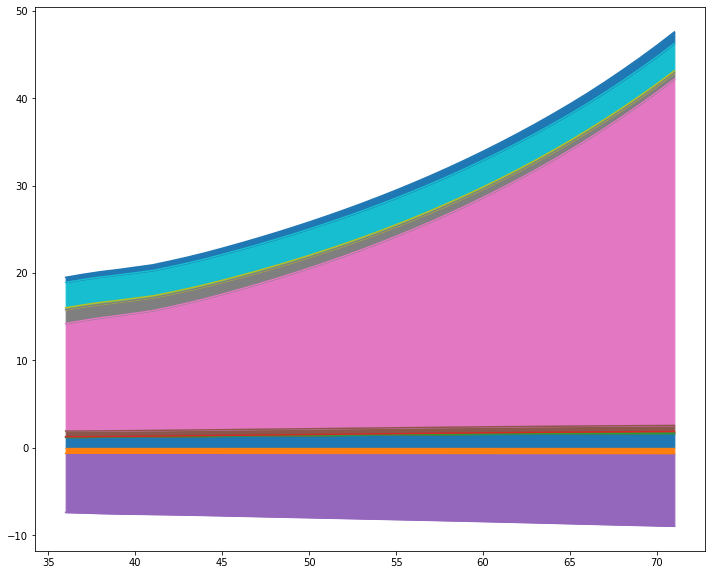

In [456]:
i = 5
fig, ax = plt.subplots(figsize = (12, 10))
df_out[df_out["primary_id"] == i][[x for x in df_out.columns if x.startswith("emission_co2e_subsector_total")]].plot.area(ax = ax)



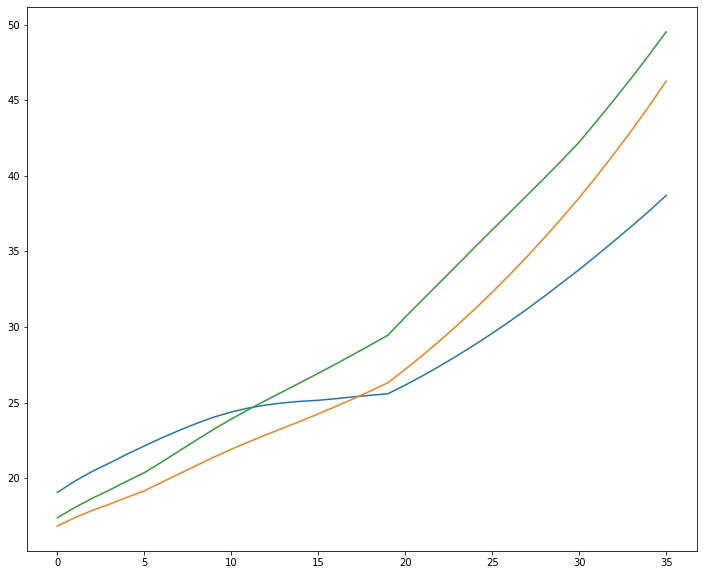

In [154]:
i = 1989
fig, ax = plt.subplots(figsize = (12, 10))

for i in sorted(list(df_out["primary_id"].unique())):
    
    df_cur = df_out[df_out["primary_id"] == i]
    
    y = np.array(df_cur[
        [x for x in df_out.columns if x.startswith("emission_co2e_subsector_")]
    ].sum(axis = 1)) 
    x = np.array(df_cur["time_period"])
    
    ax.plot(x, y)
    
plt.show()



In [23]:
df_out[df_out["time_period"] == 0][
    [x for x in df_out.columns if x.startswith("emission_co2e_") and "soil" in x]
]

,emission_co2e_co2_agrc_soil_carbon_organic_soils,emission_co2e_co2_soil_lime_and_urea_use,emission_co2e_co2_soil_soc_mineral_soils,emission_co2e_n2o_soil_fertilizer,emission_co2e_n2o_soil_mineral_soils,emission_co2e_n2o_soil_organic_soils,emission_co2e_n2o_soil_paddock_pasture_range,emission_co2e_subsector_total_soil
0,0.994542,0.053313,0.403681,1.501637,0.003458,0.262325,1.043224,3.267640
36,0.994542,0.053313,0.175370,0.415033,0.016777,0.146823,0.417928,1.225245
72,0.994542,0.053313,0.261862,0.712494,0.029453,0.184304,0.505813,1.747240


In [67]:
sisepuede.file_struct.sisepuede_analysis_id

In [61]:
sisepuede.file_struct.dir_out

'/Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/out'

In [27]:
global df_tmp 
df_tmp = 0
def project_scenarios(#self,
    primary_keys: Union[List[int], Dict[str, int], None],
    return_type: Union[type, str, None] = None
) -> None:
    """
    Project scenarios forward for a set of primary keys.

    Function Arguments
    ------------------
    - primary_keys: list of primary keys to run OR dictionary of index keys (e.g., strategy_id, design_id)
        with scenarios associated as values (uses AND operation to filter scenarios). If None, returns
        all possible primary keys.
    """

    # check primary keys to run
    if isinstance(primary_keys, dict):
        primary_keys = sorted(list(
                sf.subset_df(
                sisepuede.attribute_primary.table,
                primary_keys
            )[sisepuede.attribute_primary.key]
        ))
    elif isinstance(primary_keys, list):
        primary_keys = sorted([x for x in primary_keys if x in sisepuede.attribute_primary.key_values])
    elif primary_keys is None:
        primary_keys = sisepuede.attribute_primary.key_values

    # get designs
    df_primary_keys = sisepuede.attribute_primary.table[
        sisepuede.attribute_primary.table[sisepuede.key_primary].isin(primary_keys)
    ]
    all_designs = sorted(list(set(df_primary_keys[sisepuede.key_design])))

    # initialize output (TEMPORARY)
    df_out = []

    for design in all_designs:

        df_lhs_l, df_lhs_x = sisepuede.retrieve_lhs_tables_by_design(1, return_type = pd.DataFrame)

        # get reduced set of primary keys
        df_primary_keys_cur_design = df_primary_keys[
            df_primary_keys[sisepuede.key_design] == design
        ]
        keep_futures = sorted(list(set(df_primary_keys_cur_design[sisepuede.key_future])))

        # reduce lhs tables - LEs
        df_lhs_l = df_lhs_l[
            df_lhs_l[sisepuede.key_future].isin(keep_futures)
        ] if (df_lhs_l is not None) else df_lhs_l
        # Xs
        df_lhs_x = df_lhs_x[
            df_lhs_x[sisepuede.key_future].isin(keep_futures)
        ] if (df_lhs_x is not None) else df_lhs_x

        
        # next, loop over futures
        #  Note that self.generate_future_from_lhs_vector() will return a table for all strategies
        #  associated with the future, so we can prevent redundant calls by running all strategies
        #  that need to be run for a given future
        
        global dict_exp
        global dict_lhs
        dict_exp = {}
        dict_lhs = {}
        for future in keep_futures:
            
            # determine if baseline future and fetch lhs rows
            base_future_q = (future == sisepuede.baseline_future)
            lhs_l = df_lhs_l[df_lhs_l[sisepuede.key_future] == future].iloc[0] if ((df_lhs_l is not None) and not base_future_q) else None
            lhs_x = df_lhs_x[df_lhs_x[sisepuede.key_future] == future].iloc[0] if ((df_lhs_x is not None) and not base_future_q) else None
            dict_lhs.update({future: {"l": lhs_l, "x": lhs_x}})
            print(f"base_future {future}:\t{base_future_q}")
            # generate the futures
            df_input = sisepuede.generate_future_from_lhs_vector(
                lhs_x,
                df_row_lhc_sample_l = lhs_l,
                future_id = future,
                baseline_future_q = base_future_q
            )
            
            global df_tmp2 
            df_tmp2 = df_input.copy()
            all_strategies = sorted(list(set(df_input[sisepuede.key_strategy])))
            #print([x for x in df_input.columns if x in sisepuede.keys_index])
            #df_input.drop([x for x in df_input.columns if x in sisepuede.keys_index], axis = 1, inplace = True)
            
            for strategy in all_strategies:
                
                
                # get primary id
                id_primary = df_primary_keys_cur_design[
                        (df_primary_keys_cur_design[sisepuede.key_future] == future) &
                        (df_primary_keys_cur_design[sisepuede.key_strategy] == strategy)
                    ][sisepuede.key_primary]
                
                id_primary = int(id_primary.iloc[0]) if (len(id_primary) > 0) else None
                
                if id_primary in primary_keys:
                    
                    # filter the data frame down
                    df_input_cur = df_input[
                        (df_input[sisepuede.key_strategy] == strategy)
                    ].copy().reset_index(
                        drop = True
                    ).sort_values(
                        by = [sisepuede.model_attributes.dim_time_period]
                    ).drop(
                        [x for x in df_input.columns if x in sisepuede.keys_index], axis = 1
                    )
                    dict_exp.update({id_primary: df_input_cur})
                    # try to run the model
                    try:
                        t0 = time.time()
                        df_output = sisepuede.models.project(df_input_cur)
                        df_output = sf.add_data_frame_fields_from_dict(
                            df_output,
                            {sisepuede.key_primary: id_primary},
                            prepend_q = True
                        )
                        df_out.append(df_output) 
                        t_elapse = sf.get_time_elapsed(t0)

                        sisepuede._log(f"Model run for {sisepuede.key_primary} = {id_primary} successfully completed in {t_elapse} seconds.", type_log = "info")

                    except Exception as e:

                        sisepuede._log(f"Model run for {sisepuede.key_primary} = {id_primary} failed with the following error: {e}", type_log = "error")

    df_out = pd.concat(df_out, axis = 0).reset_index(drop = True)

    return df_out

In [30]:
#df = project_scenarios([0, 1, 998]);

df = project_scenarios([0, 1, 998]);
#df_tmp2


2022-10-18 17:02:46,240 - INFO - Running AFOLU model


base_future 0:	True


2022-10-18 17:02:46,598 - INFO - AFOLU model run successfully completed
2022-10-18 17:02:46,599 - INFO - Running CircularEconomy model
2022-10-18 17:02:46,712 - INFO - CircularEconomy model run successfully completed
2022-10-18 17:02:46,712 - INFO - Running IPPU model
2022-10-18 17:02:46,828 - INFO - IPPU model run successfully completed
2022-10-18 17:02:46,829 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2022-10-18 17:02:47,007 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2022-10-18 17:02:47,007 - INFO - Running Energy model (Electricity: trying to call Julia)


Warning in project_enfu_production_and_demands: Variable 'Energy Demand by Fuel in Electricity' not found in the data frame. Its fuel demands will not be included.
Warning in project_enfu_production_and_demands: Variable 'Energy Demand by Fuel in Electricity' not found in the data frame. Its fuel demands will not be included.


2022-10-18 17:04:55,077 - INFO - ElectricEnergy model run successfully completed
2022-10-18 17:04:55,187 - INFO - Fugitive Emissions from Energy model run successfully completed
2022-10-18 17:04:55,191 - INFO - Model run for primary_id = 0 successfully completed in 128.95 seconds.


<PyCall.jlwrap OPTIMAL>

	Running Energy (Fugitive Emissions)
base_future 1:	False


2022-10-18 17:04:55,462 - INFO - Running AFOLU model
2022-10-18 17:04:55,797 - INFO - AFOLU model run successfully completed
2022-10-18 17:04:55,798 - INFO - Running CircularEconomy model
2022-10-18 17:04:55,924 - INFO - CircularEconomy model run successfully completed
2022-10-18 17:04:55,925 - INFO - Running IPPU model
2022-10-18 17:04:56,049 - INFO - IPPU model run successfully completed
2022-10-18 17:04:56,050 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2022-10-18 17:04:56,225 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2022-10-18 17:04:56,225 - INFO - Running Energy model (Electricity: trying to call Julia)


Warning in project_enfu_production_and_demands: Variable 'Energy Demand by Fuel in Electricity' not found in the data frame. Its fuel demands will not be included.
Warning in project_enfu_production_and_demands: Variable 'Energy Demand by Fuel in Electricity' not found in the data frame. Its fuel demands will not be included.


2022-10-18 17:06:13,407 - INFO - ElectricEnergy model run successfully completed
2022-10-18 17:06:13,512 - INFO - Fugitive Emissions from Energy model run successfully completed
2022-10-18 17:06:13,516 - INFO - Model run for primary_id = 1 successfully completed in 78.05 seconds.


<PyCall.jlwrap OPTIMAL>

	Running Energy (Fugitive Emissions)
base_future 998:	False


2022-10-18 17:06:13,739 - INFO - Running AFOLU model
2022-10-18 17:06:14,088 - INFO - AFOLU model run successfully completed
2022-10-18 17:06:14,089 - INFO - Running CircularEconomy model
2022-10-18 17:06:14,208 - INFO - CircularEconomy model run successfully completed
2022-10-18 17:06:14,208 - INFO - Running IPPU model
2022-10-18 17:06:14,326 - INFO - IPPU model run successfully completed
2022-10-18 17:06:14,327 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2022-10-18 17:06:14,502 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2022-10-18 17:06:14,503 - INFO - Running Energy model (Electricity: trying to call Julia)


Warning in project_enfu_production_and_demands: Variable 'Energy Demand by Fuel in Electricity' not found in the data frame. Its fuel demands will not be included.
Warning in project_enfu_production_and_demands: Variable 'Energy Demand by Fuel in Electricity' not found in the data frame. Its fuel demands will not be included.


2022-10-18 17:07:45,517 - INFO - ElectricEnergy model run successfully completed
2022-10-18 17:07:45,612 - INFO - Fugitive Emissions from Energy model run successfully completed
2022-10-18 17:07:45,615 - INFO - Model run for primary_id = 998 successfully completed in 91.88 seconds.


<PyCall.jlwrap OPTIMAL>

	Running Energy (Fugitive Emissions)


In [31]:
#sisepuede.experimental_manager.future_trajectories.dict_sampling_units.get(1).generate_future(None, None, baseline_future_q = True)
df[df["time_period"] == 35][[x for x in df.columns if ("emission_co2e_subsector_total" in x)]].sum(axis = 1)

35     38.691910
71     49.100514
107    44.895396
dtype: float64

In [38]:
df[df["time_period"] == 35][[x for x in df.columns if ("emission_co2e_subsector_total_trns" in x)]]

,emission_co2e_subsector_total_trns
35,2.600200
71,3.556002
107,2.557119


In [75]:
tab = sisepuede.experimental_manager.primary_key_database
sf.subset_df(tab, {"primary_id": list(set(df["primary_id"]))})

,primary_id,design_id,strategy_id,future_id
0,0,0,0,0
1,1,0,0,1
998,998,0,0,998


In [71]:
sisepuede.model_attributes.dict_attributes.get("dim_design_id").table

,design_id,vary_l,vary_x,linear_transform_l_m,linear_transform_l_b,linear_transform_l_inf,linear_transform_l_sup,design_name,include
0,0,0,1,1,0.0,1.0,1.0,Vary Xs (design 0),1
1,1,1,1,1,0.5,0.5,1.0,Vary Xs and Les; Cap LE at 1 (design 1),0
2,2,1,1,1,0.5,0.5,1.5,Vary Xs and LEs; Cap LE at 1.5 (design 2),0
3,3,1,0,1,0.5,0.5,1.0,Vary LEs; (design 3),0


In [48]:
i = 25
df_input = manager.future_trajectories.generate_future_from_lhs_vector(
    df_x.iloc[i],
    df_row_lhc_sample_l = df_l.iloc[i],
    future_id = int(df_x[manager.key_future].iloc[i]),
    dict_optional_dimensions = {"design_id": 1}
)

# need to strip dimensions
dfi = df_input[
    (df_input["strategy_id"] == 0)
][[x for x in df_input.columns if not x.endswith("_id")]]


df = models.project(dfi)#, models_run = None)

#models.project(df)

2022-10-17 13:37:39,179 - INFO - Running AFOLU model
2022-10-17 13:37:39,621 - INFO - AFOLU model run successfully completed
2022-10-17 13:37:39,622 - INFO - Running CircularEconomy model
2022-10-17 13:37:39,749 - INFO - CircularEconomy model run successfully completed
2022-10-17 13:37:39,749 - INFO - Running IPPU model
2022-10-17 13:37:39,872 - INFO - IPPU model run successfully completed
2022-10-17 13:37:39,873 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2022-10-17 13:37:40,060 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2022-10-17 13:37:40,153 - INFO - Fugitive Emissions from Energy model run successfully completed



	Running Energy (Fugitive Emissions)
Warning in project_enfu_production_and_demands: Variable 'Energy Demand by Fuel in Electricity' not found in the data frame. Its fuel demands will not be included.


In [211]:
def teno(x: int) -> int:
    """
    teno's got a docstring!
    """
    
    return x**2

teno2 = teno

?teno2

Signature: teno2(x: int) -> int
Docstring: teno's got a docstring!
File:      ~/Documents/Projects/git_jbus/lac_decarbonization/python/<ipython-input-211-6fe7260f99f9>
Type:      function


In [56]:
importlib.reload(su)
df_base = ing.BaseInputDatabase(
    sa.dir_parameters_demo, 
    sa.model_attributes, 
    ["argentina", "suriname"], 
    demo_q = True,
    logger = logger
);


ft = su.FutureTrajectories(
    df_base.database,
    {"strategy_id": 0},
    5,
    logger = logger
);


2022-10-14 15:58:30,223 - WARNING - InputTemplate initialization warning: Strategy '2' not found--it will not be included in the input database.
2022-10-14 15:58:31,859 - INFO - Instantiating 1913 sampling units.
2022-10-14 15:58:31,861 - INFO - Iteration 0 complete.
2022-10-14 15:58:37,355 - INFO - Iteration 250 complete.
2022-10-14 15:58:42,749 - INFO - Iteration 500 complete.
2022-10-14 15:58:48,118 - INFO - Iteration 750 complete.
2022-10-14 15:58:53,970 - INFO - Iteration 1000 complete.
2022-10-14 15:58:59,732 - INFO - Iteration 1250 complete.
2022-10-14 15:59:05,167 - INFO - Iteration 1500 complete.
2022-10-14 15:59:10,564 - INFO - Iteration 1750 complete.
2022-10-14 15:59:14,531 - INFO - ...	1913 sampling units complete in 42.67 seconds.


In [58]:
df_l[0:1]

,design_id,future_id,86
0,1,1,0.595384


In [60]:
ft.get_df_row_element(
    df_l[0:1], 856, 1.0
)

1.0

In [427]:
att_design = sa.model_attributes.dict_attributes.get("dim_design_id")
importlib.reload(ld)

    
lhsd = ld.LHSDesign(
    att_design,
    "future_id",
    n_factors_l = 10,
    n_factors_x = 200,
    n_trials = 1000,
    random_seed = 850914,
    logger = logger,
    fields_factors_l = [f"leg_{x}" for x in range(1, 11)],
    fields_factors_x = [f"sg_{x}" for x in range(1, 201)]
)


lhsd.retrieve_lhs_tables_by_design(1)





True
-1.0


(     design_id  future_id         0         1         2         3         4  \
 0            1          1  0.806442  0.980195  0.727046  1.000000  0.926650   
 1            1          2  0.583444  0.781239  1.000000  1.000000  0.758889   
 2            1          3  0.818982  1.000000  0.834571  1.000000  0.836345   
 3            1          4  1.000000  0.881041  1.000000  1.000000  0.742423   
 4            1          5  0.882578  0.697610  1.000000  0.788705  1.000000   
 ..         ...        ...       ...       ...       ...       ...       ...   
 995          1        996  0.688240  0.965151  0.744088  1.000000  1.000000   
 996          1        997  1.000000  0.868658  1.000000  1.000000  1.000000   
 997          1        998  1.000000  1.000000  0.526185  0.614736  0.780184   
 998          1        999  0.713341  0.842490  1.000000  1.000000  1.000000   
 999          1       1000  1.000000  1.000000  0.816742  0.929203  1.000000   
 
             5         6         7    

<Logger __main__ (DEBUG)>

In [ ]:
class SISEPUEDE:
    """
    Primary interaction class for managing and interacting with SISEPUEDE. This class allows users to:
    
    - Generate futures based on input templates across classes
    - 
    
    """

In [568]:
import itertools
prods = [1, 2, 3, 4], [1, 10], [5, 6, 7]
pd.DataFrame(list(itertools.product(*prods)))

,0,1,2
0,1,1,5
1,1,1,6
2,1,1,7
3,1,10,5
4,1,10,6
5,1,10,7
6,2,1,5
7,2,1,6
8,2,1,7
9,2,10,5


In [471]:
#"""
ft.n_su, ft.all_sampling_units, ft.dict_sampling_units = n_su, all_sampling_units, dict_sampling_units
ft.all_sampling_units_l = all_sampling_units_l
ft.all_sampling_units_x = all_sampling_units_x
ft.dict_sampling_unit_to_xl_type = dict_sampling_unit_to_xl_type

In [549]:
importlib.reload(sf)
importlib.reload(ing)
importlib.reload(su)

warnings.filterwarnings("ignore")

df_base = ing.BaseInputDatabase(
    sa.dir_parameters_demo, 
    sa.model_attributes, 
    ["argentina", "suriname"], 
    demo_q = True,
    logger = logger
);


ft = su.FutureTrajectories(
    df_base.database,
    {"strategy_id": 0},
    5,
    logger = logger
);




2022-10-13 23:13:47,725 - WARNING - InputTemplate initialization warning: Strategy '2' not found--it will not be included in the input database.


In [523]:
importlib.reload(ld)
lhsd = ld.LHSDesign(
    att_design,
    "future_id",
    n_factors_l = 10,
    n_factors_x = ft.n_su,
    n_trials = 1000,
    random_seed = 850914,
    logger = logger,
    #fields_factors_l = [f"leg_{x}" for x in range(1, 11)],
    fields_factors_x = ft.all_sampling_units
)
df_lhs_l, df_lhs_x = lhsd.retrieve_lhs_tables_by_design(1, return_type = str)


2022-10-13 09:56:32,931 - INFO - LHSDesign.fields_factors_x reset successful.


<class 'str'>


In [ ]:
n_su, all_sampling_units, dict_sampling_units = ft.n_su, ft.all_sampling_units, ft.dict_sampling_units

all_sampling_units_l =ft. all_sampling_units_l
all_sampling_units_x = ft.all_sampling_units_x
dict_sampling_unit_to_xl_type = ft.dict_sampling_unit_to_xl_type

In [528]:
#"""
ft.n_su, ft.all_sampling_units, ft.dict_sampling_units = n_su, all_sampling_units, dict_sampling_units
ft.all_sampling_units_l = all_sampling_units_l
ft.all_sampling_units_x = all_sampling_units_x
ft.dict_sampling_unit_to_xl_type = dict_sampling_unit_to_xl_type
#"""

df_lhs_l, df_lhs_x = lhsd.retrieve_lhs_tables_by_design(1)

t0 = time.time()
df_fut = ft.generate_future_from_lhs_vector(
    df_lhs_x.iloc[0:1],
    future_id = 10
);


2022-10-13 10:00:38,301 - WARNING - Invalid length of LHC samples specified in get_future: 1915 elements were specified; there should be 1913


None
0.0


In [19]:
df_fut

NameError: name 'df_fut' is not defined

In [443]:
i = 130
fut = int(df_lhs_x["future_id"].iloc[i])
ft.generate_future_from_lhs_vector(
    df_lhs_x[ft.all_sampling_units].iloc[i:(i + 1)],
    future_id = fut
)

,future_id,time_period,strategy_id,factor_lndu_soil_management_grasslands,area_gnrl_country_ha,avgload_trns_freight_tonne_per_vehicle_rail_freight,avgload_trns_freight_tonne_per_vehicle_road_heavy_freight,avgload_trns_freight_tonne_per_vehicle_water_borne,avgmass_lvst_animal_buffalo_kg,avgmass_lvst_animal_cattle_dairy_kg,...,yf_agrc_fruits_tonne_ha,yf_agrc_herbs_and_other_perennial_crops_tonne_ha,yf_agrc_nuts_tonne_ha,yf_agrc_other_annual_tonne_ha,yf_agrc_other_woody_perennial_tonne_ha,yf_agrc_pulses_tonne_ha,yf_agrc_rice_tonne_ha,yf_agrc_sugar_cane_tonne_ha,yf_agrc_tubers_tonne_ha,yf_agrc_vegetables_and_vines_tonne_ha
0,131,0,0,0.371209,5113100.0,2000.000000,20.000000,2000.000000,315.000000,508.000000,...,52.960000,1.010000,1.300000,1.000000,20.0,0.620000,2.900000,1.620000,20.000000,2.800000
1,131,1,0,0.371209,5113100.0,2000.000000,20.000000,2000.000000,315.000000,508.000000,...,52.960000,1.010000,1.300000,1.000000,20.0,0.620000,2.900000,1.620000,20.000000,2.800000
2,131,2,0,0.371209,5113100.0,2000.000000,20.000000,2000.000000,315.000000,508.000000,...,52.960000,1.010000,1.300000,1.000000,20.0,0.620000,2.900000,1.620000,20.000000,2.800000
3,131,3,0,0.377085,5113100.0,2000.000000,20.000000,2000.000000,315.000000,508.000000,...,52.960000,1.010000,1.300000,1.000000,20.0,0.620000,2.900000,1.620000,20.000000,2.800000
4,131,4,0,0.382960,5113100.0,2000.000000,20.000000,2000.000000,315.000000,508.000000,...,52.960000,1.010000,1.300000,1.000000,20.0,0.620000,2.900000,1.620000,20.000000,2.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,131,31,1,0.541597,5113100.0,2248.467167,23.226629,2316.194680,310.197571,510.513429,...,50.747510,0.952169,1.295045,1.061914,20.0,0.718053,2.943096,1.595812,21.001428,2.564648
68,131,32,1,0.547473,5113100.0,2258.023597,23.350730,2328.356013,310.012863,510.610099,...,50.662415,0.949945,1.294854,1.064296,20.0,0.721824,2.944753,1.594881,21.039944,2.555596
69,131,33,1,0.553348,5113100.0,2267.580026,23.474831,2340.517347,309.828154,510.706769,...,50.577319,0.947720,1.294663,1.066677,20.0,0.725595,2.946411,1.593951,21.078461,2.546544
70,131,34,1,0.559224,5113100.0,2277.136456,23.598932,2352.678681,309.643445,510.803440,...,50.492223,0.945496,1.294473,1.069058,20.0,0.729366,2.948068,1.593021,21.116977,2.537492


In [449]:
?AttributeTable

Init signature:
AttributeTable(
    fp_table: Union[str, pandas.core.frame.DataFrame],
    key: str,
    fields_to_dict: list,
    clean_table_fields: bool = True,
)
Docstring:     
AttributeTable class checks existence, keys, key values, and generates field maps

Function Arguments
------------------
- fp_table:
- key:
- fields_to_dict:

Keyword Arguments
-----------------
- clean_table_fields: clean field names from input CSV or DataFrame to ensure lower case/no spaces
File:           ~/Documents/Projects/git_jbus/lac_decarbonization/python/attribute_table.py
Type:           type
Subclasses:     


In [151]:
df_test = pd.read_csv("/Users/jsyme/Desktop/al_2020_block_populations.csv");

In [175]:
isinstance(df_lhs_x.iloc[0], pd.Series)
float(df_lhs_x.iloc[0][1])


0.4679844790681395

In [173]:
df_lhs_x = pyd.lhs(
    len(ft.all_sampling_units),
    2000
);

df_lhs_x = pd.DataFrame(
    df_lhs_x,
    columns = ft.all_sampling_units
)

In [143]:
def get_future(#self,
    vec_ordered_lhc_sample: np.ndarray
):
    """
    Build a data frame of a single future for all sample units
    
    Function Arguments
    ------------------
    vec_ordered_lhc_sample: ordered vector (with self.n_su elements)
    
    Keyword Arguments
    -----------------
    
    """

    # check the specification of
    if len(vec_ordered_lhc_sample) != ft.n_su:
        n_v = len(vec_ordered_lhc_sample)
        ft._log(f"Invalid length of LHC samples specified in get_future: {n_v} where specified; there should be {ft.n_su}", type_log = "warning")
        return None
    
    # map index in vector to sample group
    dict_ind_to_su = dict(enumerate(ft.all_sampling_units))
    dict_su_to_ind = sf.reverse_dict(dict_ind_to_su)
    # 
    
    dict_df = {}
    df_out = []
    for k in enumerate(ft.all_sampling_units):
        k, su = k
        samp = ft.dict_sampling_units.get(su)
        if samp is not None:
            fut = samp.generate_future(vec_ordered_lhc_sample[k])
            dict_df.update(
                dict((key, value.flatten()) for key, value in fut.items())
            )
            
            if len(df_out) == 0:
                df_out.append(
                    samp.generate_indexing_data_frame()
                )

    
    df_out.append(pd.DataFrame(dict_df))
    df_out = pd.concat(df_out, axis = 1).reset_index(drop = True)
    
    return df_out
    

In [29]:
d

NameError: name 'd' is not defined

In [142]:
#ft.dict_sampling_units[1].generate_future(df_lhs_x[0, 0])


In [1442]:
randos = np.random.rand(10000)
randos;

In [1443]:
t0 = time.time()
vecs = [dict_su.get(1).generate_future(x).get("factor_lndu_soil_management_grasslands").flatten() for x in randos]
t1 = time.time()

t_elapse = np.round(t1 - t0, 2)
n = len(randos)
print(f"Time elapsed for {n} trials:\t{t_elapse}")

Time elapsed for 10000 trials:	0.29


In [1404]:
all_sample_groups = sorted(list(set(df_tmp[ft.field_sample_unit_group])))

for sg in all_sample_groups:

    df_tmp[df_tmp[ft.field_sample_unit_group] == sg].drop("sample_unit_group", axis = 1)

In [ ]:
iterate

In [1410]:
tst = df_tmp.groupby("sample_unit_group")
print(len(tst))
for i in enumerate(tst):
    i, val = i
    if i%100 == 0:
        print(i)
        print(isinstance(val[1], pd.DataFrame))

1913
0
True
100
True
200
True
300
True
400
True
500
True
600
True
700
True
800
True
900
True
1000
True
1100
True
1200
True
1300
True
1400
True
1500
True
1600
True
1700
True
1800
True
1900
True


In [1329]:

dict_k = {}
for k in [1, 2]:
    dict_k.update({k:
        su.SamplingUnit(
            df_tmp[df_tmp["sample_unit_group"] == k].drop("sample_unit_group", axis = 1),
            {"strategy_id": 0},
            5
        )
    }
    )

dict_k


{1: <sampling_unit.SamplingUnit at 0x7f827d90d6d0>,
 2: <sampling_unit.SamplingUnit at 0x7f827d257670>}

In [1332]:
dict_k[1].generate_future(0.5, lhs_trial_l = 1, baseline_future_q = False)["factor_lndu_soil_management_grasslands"].flatten()

array([0.45 , 0.45 , 0.45 , 0.455, 0.46 , 0.465, 0.47 , 0.475, 0.48 ,
       0.485, 0.49 , 0.495, 0.5  , 0.505, 0.51 , 0.515, 0.52 , 0.525,
       0.53 , 0.535, 0.54 , 0.545, 0.55 , 0.555, 0.56 , 0.565, 0.57 ,
       0.575, 0.58 , 0.585, 0.59 , 0.595, 0.6  , 0.605, 0.61 , 0.615,
       0.45 , 0.45 , 0.45 , 0.455, 0.46 , 0.465, 0.47 , 0.475, 0.48 ,
       0.485, 0.49 , 0.495, 0.5  , 0.505, 0.51 , 0.515, 0.52 , 0.525,
       0.53 , 0.535, 0.54 , 0.545, 0.55 , 0.555, 0.56 , 0.565, 0.57 ,
       0.575, 0.58 , 0.585, 0.59 , 0.595, 0.6  , 0.605, 0.61 , 0.615])

In [ ]:
df_lhs_l, df_lhs_x = self.experimental_manager.lhs_design.retrieve_lhs_tables_by_design(1, return_type = str)

In [1293]:


df_id_coords = dict_k[1].df_id_coordinates
pd.merge(
    tmp,
    pd.DataFrame({"time_period": dict_k[1].time_periods, "dummy": -1}), 
    how = "outer"
).drop("dummy", axis = 1)

,strategy_id,primary_key_id_coord,time_period
0,0,0,0
1,0,0,1
2,0,0,2
3,0,0,3
4,0,0,4
...,...,...,...
67,1,1,31
68,1,1,32
69,1,1,33
70,1,1,34


In [1206]:
import multiprocessing as mp
mp.cpu_count()

12

In [1181]:
importlib.reload(su)
db1 = df_tmp[
    ["factor_lndu_soil_management_grasslands" in x for x in list(df_tmp["variable"])]
]
samp2 = su.SamplingUnit(
    db1,
    {"strategy_id": 0},
    5
)

In [1182]:
samp2.generate_future((0.4/1.14), lhs_trial_l = 0.5, baseline_future_q = False)

{'trajmax_factor_lndu_soil_management_grasslands': array([[0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9,
         0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9,
         0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9],
        [0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9,
         0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9,
         0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9]]),
 'trajmin_factor_lndu_soil_management_grasslands': array([[0.  , 0.  , 0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08,
         0.09, 0.1 , 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19,
         0.2 , 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 ,
         0.31, 0.32, 0.33],
        [0.  , 0.  , 0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08,
         0.09, 0.1 , 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19,
         0.2 , 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 ,
    

In [ ]:
df_base = 

[[157.48 157.48 157.48 157.48 157.48 157.48 157.48 157.48 157.48 157.48
  157.48 157.48 157.48 157.48 157.48 157.48 157.48 157.48 157.48 157.48
  157.48 157.48 157.48 157.48 157.48 157.48 157.48 157.48 157.48 157.48
  157.48 157.48 157.48 157.48 157.48 157.48]
 [157.48 157.48 157.48 157.48 155.48 153.48 151.48 149.48 147.48 145.48
  143.48 141.48 139.48 137.48 135.48 133.48 131.48 129.48 127.48 125.48
  123.48 121.48 119.48 117.48 115.48 113.48 111.48 109.48 107.48 105.48
  103.48 101.48  99.48  97.48  95.48  93.48]]


{'ef_agrc_anaerobicdom_rice_kg_ch4_ha': array([[157.48, 157.48, 157.48, 157.48, 157.48, 157.48, 157.48, 157.48,
         157.48, 157.48, 157.48, 157.48, 157.48, 157.48, 157.48, 157.48,
         157.48, 157.48, 157.48, 157.48, 157.48, 157.48, 157.48, 157.48,
         157.48, 157.48, 157.48, 157.48, 157.48, 157.48, 157.48, 157.48,
         157.48, 157.48, 157.48, 157.48],
        [157.48, 157.48, 157.48, 157.48, 156.48, 155.48, 154.48, 153.48,
         152.48, 151.48, 150.48, 149.48, 148.48, 147.48, 146.48, 145.48,
         144.48, 143.48, 142.48, 141.48, 140.48, 139.48, 138.48, 137.48,
         136.48, 135.48, 134.48, 133.48, 132.48, 131.48, 130.48, 129.48,
         128.48, 127.48, 126.48, 125.48]])}

In [ ]:
### np.concatenate(
    samp.ordered_trajectory_arrays.get(("ef_agrc_anaerobicdom_rice_kg_ch4_ha", None))["id_coordinates"][samp.field_strategy_id].apply(
    samp.dict_strategy_info["difference_arrays_by_strategy"].get,
    args = (np.zeros((1, len(samp.time_periods))),)
)
)

In [1042]:
len(np.where(np.ones(5) > 2)[0])
#np.ones((1, len(samp.time_periods)))


0

In [1010]:
#samp.dict_strategy_info.get("difference_arrays_by_strategy")
dict_1 = {0:2, 1:4, 3: 9}
dict_1.get(2, -1)

-1

In [1008]:
samp.dict_strategy_info["difference_arrays_by_strategy"]#["baseline_strategy_data_table"][samp.field_variable_trajgroup_type]


{1: array([[  0.,   0.,   0.,   0.,  -2.,  -4.,  -6.,  -8., -10., -12., -14.,
         -16., -18., -20., -22., -24., -26., -28., -30., -32., -34., -36.,
         -38., -40., -42., -44., -46., -48., -50., -52., -54., -56., -58.,
         -60., -62., -64.]])}

In [976]:
import sqlite3
con = sqlite3.connect("/Users/jsyme/Documents/PRGS/Dissertation/computing/julia_districting/out/tmp_test.sqlite")
res = con.execute("select * from TABLE_SCHEMA;")

#pd.read_sql("select * from METRIC;", con)

OperationalError: no such table: INFORMATION_SCHEMA

In [890]:
#df_base.database

In [706]:
#?pd.DataFrame.apply

In [832]:
var1 = su.SamplingUnit(df_tmp, {"strategy_id": 0}, 5)

In [838]:
#clean_trajectory_groups(df_tmp)

In [814]:
regex_trajgroup.match(df_in[df_in["variable_trajectory_group"] > 0]["variable"].iloc[1149]).groups()[1]

'trajmix_transport_frac_aviation_kerosene'

In [793]:
#app = df_tmp["variable"].apply(get_trajgroup_and_variable_specification)
field_variable = "variable"
field_variable_trajgroup = "variable_trajectory_group"
field_variable_trajgroup_type = "variable_trajectory_group_trajectory_type"

regex_trajgroup = re.compile("trajgroup_(\d*)-(\D*$)")
regex_trajmax = re.compile("trajmax_(\D*$)")
regex_trajmin = re.compile("trajmin_(\D*$)")
regex_trajmix = re.compile("trajmix_(\D*$)")

specification_tgt_max = "trajectory_boundary_1"
specification_tgt_min = "trajectory_boundary_0"
        
df_add = df_tmp[field_variable].apply(
    get_trajgroup_and_variable_specification,


    regex_trajgroup = regex_trajgroup,
    regex_trajmax = regex_trajmax,
    regex_trajmin = regex_trajmin,
    regex_trajmix = regex_trajmix
)

df_add = pd.DataFrame([np.array(x) for x in df_add], columns = [field_variable_trajgroup, field_variable_trajgroup_type])
df_add[field_variable_trajgroup] = df_add[field_variable_trajgroup].replace({None: -999})
df_add[field_variable_trajgroup] = df_add[field_variable_trajgroup].astype(int)
df_in = pd.concat([df_tmp, df_add], axis = 1)

In [794]:
new_tg = max(df_in[df_in[field_variable_trajgroup] >= 0][field_variable_trajgroup]) + 1
tgs = list(df_in[field_variable_trajgroup].copy())
tgspecs = list(df_in[field_variable_trajgroup_type].copy())
var_list = list(df_in[field_variable].copy())
dict_parameter_to_tg = {}
dict_repl_tgt = {"max": specification_tgt_max, "min": specification_tgt_min}

'1'

{(0,): 1.0, (1,): 1.0}

In [610]:
importlib.reload(sf)
importlib.reload(su)
var1 = su.SamplingUnit(df_tmp, {"strategy_id": 0}, 5)

In [611]:
var1

In [619]:
lhsv = pyd.lhs(5, 100)

In [621]:
var1.variable_specifications[0]

'ef_agrc_anaerobicdom_rice_kg_ch4_ha'

In [634]:
from typing import *
def f(x: str) -> Union[Dict[str, np.ndarray], None]:
    return None

In [638]:
#var1.generate_future(lhsv[0, 1],  baseline_future_q = False)#[var1.variable_specifications[2]]


In [195]:
var1.generate_future(0.1, lhs_trial_design = 0.5, baseline_future_q = False)

{'transport_frac_aviation_hydrogen': array([[0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
         0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
         0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
         0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
         0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
         0.      , 0.      , 0.      , 0.      , 0.      , 0.      ],
        [0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
         0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
         0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
         0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
         0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
         0.      , 0.      , 0.      , 0.      , 0.      , 0.      ],
        [0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
         0.      , 0.      , 0.      , 0.      , 0.      , 0.    

## cat_mix = var1.dict_required_tg_spec_fields["mixing_trajectory"]
cat_b0 = var1.dict_required_tg_spec_fields["trajectory_boundary_0"]
cat_b1 = var1.dict_required_tg_spec_fields["trajectory_boundary_1"]
vs = "steel_heat_biomass"
cat_cur = cat_mix

ind_repl = 0
strat = 1
lhs_trial_delta = 0.6


#
# initialize some attributes
#    field_trajgroup = "variable_trajectory_group"
#    field_trajgroup_spec = "variable_trajectory_group_trajectory_type"
#    field_uniform_scaling_q = "uniform_scaling_q"
#    field_var_spec = "variable"

var1.ordered_trajectory_arrays[("steel_heat_biomass", "mix")]["id_coordinates"]
var1.dict_strategy_info.keys()
#var1.dict_strategy_info["baseline_strategy_data_table"][

# get the index for the current vs/cat_cur
inds = np.where(var1.dict_strategy_info["baseline_strategy_data_table"][var1.field_var_spec].isin([vs]) & var1.dict_strategy_info["baseline_strategy_data_table"][var1.field_trajgroup_spec].isin([cat_cur]))
df_ids0 = var1.dict_strategy_info["baseline_strategy_data_table"][[x for x in var1.fields_id if (x != var1.field_strategy_id)]].loc[inds]

# initialize as list - we only do this to guarantee the sort is correct
df_future_strat = []
##  start loop
for strat in var1.dict_id_values[var1.field_strategy_id]:

    # get ids for sort
    df_ids = df_ids0.copy()
    df_ids[var1.field_strategy_id] = strat
    
    # get the strategy difference that is adjusted by lhs_trial_delta; if baseline strategy, use 0s
    df_repl = np.zeros((len(inds[0]), len(var1.fields_time_periods))) if (strat == var1.dict_baseline_ids[var1.field_strategy_id]) else var1.dict_strategy_info["difference_arrays_by_strategy"][strat][inds[0], :]*lhs_trial_delta
    df_repl = pd.concat([df_ids.reset_index(drop = True), pd.DataFrame(df_repl, columns = var1.fields_time_periods)], axis = 1 )
    df_future_strat.append(df_repl)

df_future_strat = pd.concat(df_future_strat, axis = 0).sort_values(by = var1.fields_id).reset_index(drop = True)
arr_out[vs] + np.array(df_future_strat[var1.fields_time_periods]
#pd.concat([df_future_strat[var1.fields_id], pd.DataFrame(arr_out[vs] + np.array(df_future_strat[var1.fields_time_periods]), columns = var1.fields_time_periods)], axis = 1)





In [228]:
np.zeros((len(inds[0]), len(var1.fields_time_periods)))

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]])

In [ ]:
#df_tmp[~df_tmp["variable_trajectory_group"].isna() & (~df_tmp["variable_trajectory_group_trajectory_type"].isna())]#.head()
#str(df_tmp["variable_trajectory_group"].iloc[9]) == "<NA>"
#[["trajgroup_1" in x for x in df_tmp0["parameter"]]]["parameter"].unique()
#df_tmp[df_tmp["variable_trajectory_group"].isin([10])]
#df_tmp0[["pib" in x for x in df_tmp0["parameter"]]]#["parameter"]
var1.dict_strategy_info["difference_arrays_by_strategy"][1]#.keys()
lhs_trial_design = 0.6
lhs_trial = 0.5
baseline_future_q = False

arr_0 = np.zeros(var1.ordered_trajectory_arrays[(var1.variable_specifications[0], "mix")]["data"].shape)
ind = 0

cat_mix = var1.dict_required_tg_spec_fields["mixing_trajectory"]
cat_b0 = var1.dict_required_tg_spec_fields["trajectory_boundary_0"]
cat_b1 = var1.dict_required_tg_spec_fields["trajectory_boundary_1"]

for strat in var1.dict_id_values[var1.field_strategy_id]:
    
    # create a new dataframe, add the strategy id, then add in additional columns like variable, type etc.
    df_tmp = pd.DataFrame(var1.dict_strategy_info["baseline_strategy_array"] + lhs_trial_design * var1.dict_strategy_info["difference_arrays_by_strategy"][strat], columns = var1.fields_time_periods)
    df_tmp[var1.field_strategy_id] = strat
    df_tmp = sf.df_get_missing_fields_from_source_df(df_tmp, var1.dict_strategy_info["baseline_strategy_data_table"])
    
    #use the ordered trajectory arrays fuction
    dict_ota_tmp = var1.get_ordered_trajectory_arrays(df_tmp2, var1.fields_id, var1.fields_time_periods, var1.variable_specifications);

    # use mix between 0/1 (0 = 100% trajectory_boundary_0, 1 = 100% trajectory_boundary_1)
    for vs in var1.variable_specifications:
        arr_b0 = dict_ota_tmp[(vs, cat_b0)]["data"]
        arr_b1 = dict_ota_tmp[(vs, cat_b1)]["data"]
        arr_mix = dict_ota_tmp[(vs, cat_mix)]["data"]

        if baseline_future_q:
            # for trajectory groups, the baseline is the specified mixing vector
            arr_out = self.mix_tensors(arr_b0, arr_b1, arr_mix, constraints_mix_tg)
        else:
            arr_out = self.mix_tensors(arr_b0, arr_b1, lhs_trial, constraints_mix_tg)
    
    
    
#df_tmp = pd.concat([df_tmp, ])

#var1.ordered_trajectory_arrays

#var1.get_ordered_trajectory_arrays(self.data_table, self.fields_id, self.fields_time_periods, self.variable_specifications)




In [35]:
df_tmp[(df_tmp["variable_trajectory_group"] == 8) & (df_tmp["variable"] == "steel_heat_coal")];

In [107]:
#var1.generate_future(0, baseline_future_q = False)
var3.generate_future(0, baseline_future_q = False)

{'manejo_holistico_de_gando': array([[0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
         0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
         0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
         0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
         0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
        [0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9,
         0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9,
         0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9],
        [0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9,
         0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9,
         0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9],
        [0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9,
         0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0

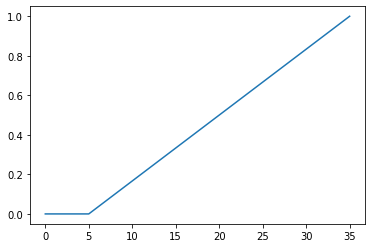

In [425]:
### var3.dict_strategy_info["baseline_strategy_data_table"]
#var4.dict_variable_info[("pib", "mix")]["max_scalar"]#ordered_trajectory_arrays[("manejo_holistico_de_gando", None)]["data"][:,-1]
#[tuple(x) for x in np.array(var4.ordered_trajectory_arrays[("pib", "mix")]["id_coordinates"])]
#var4.ordered_trajectory_arrays[("pib", "mix")]["data"][:, -5:]
y = var4.build_ramp_vector((0, 2, 1, len(var4.time_periods) - var4.time_period_end_certainty))
#y = var4.build_ramp_vector((1, 0, math.e, (len(var4.time_periods) - var4.time_period_end_certainty)/2))
x = var4.time_periods
plt.plot(x, y)
plt.show()

In [95]:
var3.ordered_trajectory_arrays[("manejo_holistico_de_gando", None)]#()


{'manejo_holistico_de_gando': array([[0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
         0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
         0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
         0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
         0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
        [0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,
         0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,
         0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2],
        [0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,
         0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,
         0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2],
        [0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,
         0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0

In [88]:
#var4.dict_variable_info[(vs, tgs)]["uniform_scaling_q"]
#var3.dict_variable_info[("manejo_holistico_de_gando", None)]#["uniform_scaling_q"]
1 - np.array([[1, 2, 3], [2, 3, 1]])

array([[ 0, -1, -2],
       [-1, -2,  0]])

In [139]:
#dfl = pd.read_csv("/Users/jsyme/Documents/Projects/FY20/SWCHE102-1000/git/MultiSector_LTS_Chile/archive_runs/Chile_sector_package_2021_02_20_design_id-1/experimental_design_multi_sector.csv")
#list(dfl.columns)eerreeeeeee
#var1.generate_future(, baseline_future_q = True)

var1.data_table[var1.data_table["strategy_id"] == 0][fields_ext].drop_duplicates()




(False,
 {'baseline_strategy_data_table':                                  variable  \
  8      residential_apartment_acs_electric   
  4      residential_apartment_acs_electric   
  0      residential_apartment_acs_electric   
  9   residential_apartment_acs_natural_gas   
  5   residential_apartment_acs_natural_gas   
  1   residential_apartment_acs_natural_gas   
  10      residential_apartment_acs_pliqgas   
  6       residential_apartment_acs_pliqgas   
  2       residential_apartment_acs_pliqgas   
  11        residential_apartment_acs_solar   
  7         residential_apartment_acs_solar   
  3         residential_apartment_acs_solar   
  80     residential_apartment_acs_electric   
  76     residential_apartment_acs_electric   
  72     residential_apartment_acs_electric   
  81  residential_apartment_acs_natural_gas   
  77  residential_apartment_acs_natural_gas   
  73  residential_apartment_acs_natural_gas   
  82      residential_apartment_acs_pliqgas   
  78      residentia

In [76]:
#df_tmp[df_tmp["sector"] == "transport"]["variable"].unique()
#df_tmp[df_tmp["variable_trajectory_group"] == 6]["variable"]
var1.dict_id_values
var1.dict_baseline_ids

def test():
    try:
        raise Exception("this")
    except Exception as exc:
        print(exc.args)
        raise
    finally:

        print("54")
        pass

        x = 5
        print(x)
        
        return x
    
ll = test()

('this',)
54
5


In [484]:
#sampling_unit.mix_vecs(range(6), np.ones(6), [0.1, 0.1, 0.2, 0.8, 0.9, 0.99])
#var1.apply_lhs(np.array([5, 3]))
var2.apply_lhs([5, 2])

set([x[0] for x in var1.ordered_trajectory_arrays.keys()])
v1 = np.array([[1, 3, 5], [-1, 3, 1]])/4
a1 = (v1/v1.clip(*(0, 1)))#.nan_to_num(0)
a1[np.abs(a1) == np.inf] = 0
a1
#type(pyd.lhs(4, 10)[:, 0])

No trajgroup found.


<ipython-input-484-db433600a407>:7: RuntimeWarning: divide by zero encountered in true_divide
  a1 = (v1/v1.clip(*(0, 1)))#.nan_to_num(0)


array([[1.  , 1.  , 1.25],
       [0.  , 1.  , 1.  ]])

In [77]:
ss = list(var1.id_coordinates)
ss.sort()
warnings.warn("warning!")

<ipython-input-77-3d682440c941>:3: UserWarning: warning!
  warnings.warn("warning!")


In [ ]:
var1 = sampling_unit(df_tmp[df_tmp["variable_trajectory_group"] == None], {"time_series_id": 0})

In [ ]:
#var1.id_coordinates
df_prepend = df_tmp[df_tmp["variable_specification"] == "manejo_holistico_de_gando"].copy()
df_append = df_tmp[(df_tmp["variable_specification"] == "transport_truck_investment_cost_hydrogen") & (df_tmp["strategy_id"] > 0)].copy()

df_test = pd.concat([df_prepend, df_append])

In [ ]:
df_tmp[df_tmp["parameter_constant_q"].isin([1.0]) & df_tmp[""]]

In [ ]:
dict_temp = {1: "this is", 2: "this isnt", 3: "dont"}
[k for k,v in dict_temp.items() if "this" in v]

In [ ]:
sf.build_dict(df_tmp[["time_series_id", "strategy_id", "type"]])

In [ ]:
import importlib
importlib.reload(sa)

In [ ]:
(["01", "02"], [1, 2])                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [ ]:
df_tmp = pd.read_csv("/Users/jsyme/Documents/Projects/FY20/SWCHE102-1000/git/MultiSector_LTS_Chile/ref/parameter_ranges.csv")
df_tmp0 = df_tmp.copy()
dict_rnm = dict([(str(x), str(x - 2015)) for x in range(2015, 2051)])
dict_rnm.update({"min_2050": "min_35", "max_2050": "max_35", "parameter": "variable", "parameter_constant_q": "uniform_scaling_q"})
df_tmp.rename(columns = dict_rnm, inplace = True)


In [74]:
df_all_transitions_out = pd.read_csv(
    sa.fp_csv_transition_probability_estimation_annual
)
df_mean_transition_out = pd.read_csv(
    sa.fp_csv_transition_probability_estimation_mean
)

In [75]:
df_all_transitions_out

,croplands_to_croplands,croplands_to_forests_mangroves,croplands_to_forests_primary,croplands_to_forests_secondary,croplands_to_grasslands,croplands_to_other,croplands_to_settlements,croplands_to_wetlands,forests_mangroves_to_croplands,forests_mangroves_to_forests_mangroves,...,wetlands_to_forests_mangroves,wetlands_to_forests_primary,wetlands_to_forests_secondary,wetlands_to_grasslands,wetlands_to_other,wetlands_to_settlements,wetlands_to_wetlands,year,country,optimization_bound
0,0.995000,0.00000,0.0,0.000000,0.000100,0.004110,0.000137,0.000653,0.0,0.9985,...,0.000000,0.0,0.000000,0.0,0.0001,0.000000,0.998500,1999,argentina,max_diagonal
1,0.995000,0.00000,0.0,0.000000,0.000100,0.004900,0.000000,0.000000,0.0,0.9985,...,0.000000,0.0,0.000000,0.0,0.0001,0.000000,0.990945,2001,argentina,max_diagonal
2,0.995000,0.00000,0.0,0.000000,0.000100,0.004900,0.000000,0.000000,0.0,0.9985,...,0.000000,0.0,0.000000,0.0,0.0001,0.000000,0.979022,2002,argentina,max_diagonal
3,0.995000,0.00000,0.0,0.000000,0.000100,0.004900,0.000000,0.000000,0.0,0.9985,...,0.000000,0.0,0.000000,0.0,0.0001,0.000000,0.975533,2003,argentina,max_diagonal
4,0.995000,0.00000,0.0,0.000390,0.000100,0.004446,0.000065,0.000000,0.0,0.9985,...,0.000000,0.0,0.000000,0.0,0.0000,0.000000,0.990757,2004,argentina,max_diagonal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,0.950000,0.00075,0.0,0.000000,0.043864,0.005000,0.000000,0.000000,0.0,0.9700,...,0.009040,0.0,0.000000,0.0,0.0001,0.000000,0.990860,2011,venezuela,min_diagonal
362,0.950000,0.00075,0.0,0.000000,0.032720,0.005000,0.009050,0.000000,0.0,0.9700,...,0.000000,0.0,0.019900,0.0,0.0001,0.000000,0.980000,2012,venezuela,min_diagonal
363,0.950000,0.00000,0.0,0.026658,0.000100,0.005000,0.000000,0.010000,0.0,0.9700,...,0.004093,0.0,0.013341,0.0,0.0001,0.000000,0.980000,2013,venezuela,min_diagonal
364,0.979380,0.00000,0.0,0.008885,0.000100,0.005000,0.000000,0.000000,0.0,0.9700,...,0.000000,0.0,0.013494,0.0,0.0001,0.006406,0.980000,2014,venezuela,min_diagonal


In [76]:
sa.fp_csv_transition_probability_estimation_annual

'/Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/ref/batch_data_generation/baseline_transition_probability_estimates/transition_probs_by_region_and_year.csv'